# House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

## Data fields

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access

**Alley**: Type of alley access

**LotShape**: General shape of property

**LandContour**: Flatness of the property

**Utilities**: Type of utilities available

**LotConfig**: Lot configuration

**LandSlope**: Slope of property

**Neighborhood**: Physical locations within Ames city limits

**Condition1**: Proximity to main road or railroad

**Condition2**: Proximity to main road or railroad (if a second is present)

**BldgType**: Type of dwelling

**HouseStyle**: Style of dwelling

**OverallQual**: Overall material and finish quality

**OverallCond**: Overall condition rating

**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date

**RoofStyle**: Type of roof

**RoofMatl**: Roof material

**Exterior1st**: Exterior covering on house

**Exterior2nd**: Exterior covering on house (if more than one material)

**MasVnrType**: Masonry veneer type

**MasVnrArea**: Masonry veneer area in square feet

**ExterQual**: Exterior material quality

**ExterCond**: Present condition of the material on the exterior

**Foundation**: Type of foundation

**BsmtQual**: Height of the basement

**BsmtCond**: General condition of the basement

**BsmtExposure**: Walkout or garden level basement walls

**BsmtFinType1**: Quality of basement finished area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2**: Quality of second finished area (if present)

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating**: Type of heating

**HeatingQC**: Heating quality and condition

**CentralAir**: Central air conditioning

**Electrical**: Electrical system

**1stFlrSF**: First Floor square feet

**2ndFlrSF**: Second floor square feet

**LowQualFinSF**: Low quality finished square feet (all floors)

**GrLivArea**: Above grade (ground) living area square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual**: Kitchen quality

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality rating

**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

**GarageCond**: Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF**: Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**PoolQC**: Pool quality

**Fence**: Fence quality

**MiscFeature**: Miscellaneous feature not covered in other categories

**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold

**YrSold**: Year Sold

**SaleType**: Type of sale

**SaleCondition**: Condition of sale

# Data Analysys

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


we have dtypes: **float-3, int-34, object-43** 

We also see that there are columns with missing values, some of them are almost completely empty, let's study them first

## Check columns with the most missing values

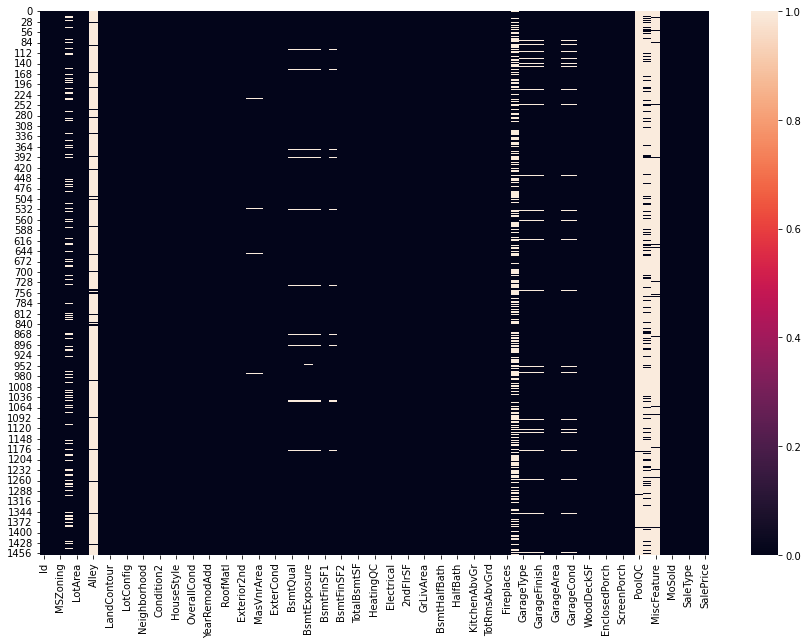

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull());

**Alley:** Type of alley access

**FireplaceQu:** Fireplace quality

**PoolQC:** Pool quality

**Fence:** Fence quality

**MiscFeature:** Miscellaneous feature not covered in other categories

In [6]:
print(
    'Alley:',train['Alley'].unique(), round(train['Alley'].count()/train.shape[0],3),'%',
    '\nFireplaceQu:',train['FireplaceQu'].unique(), round(train['FireplaceQu'].count()/train.shape[0],3),'%',
    '\nPoolQC:',train['PoolQC'].unique(), round(train['PoolQC'].count()/train.shape[0],3),'%',
    '\nFence:',train['Fence'].unique(), round(train['Fence'].count()/train.shape[0],3),'%',
    '\nMiscFeature:',train['MiscFeature'].unique(), round(train['MiscFeature'].count()/train.shape[0],3),'%',
    )


Alley: [nan 'Grvl' 'Pave'] 0.062 % 
FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 0.527 % 
PoolQC: [nan 'Ex' 'Fa' 'Gd'] 0.005 % 
Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 0.192 % 
MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC'] 0.037 %


--------------------------
If we analyze the variables in more detail, we can assume that

that NaN in this case is not a missing, but an identifier that there is no presence of a certain object in the house.

For example, **Alley** NaN may mean that there is no access through the alley to the house

**FireplaceQu** NaN means that there is no fireplace in the house at all

**PoolQC** NaN means no pool

**Fence** NaN means no fence

**MiscFeature** NaN means the absence of various features

--------------------

But this assumption does not have to be true or it can be half true, in which case we will mark the real NaNs as an absence target, which is also not a good solution.


I'll still assume that NaN is indeed the absence factor and re-encode to class **'No'**

In [7]:
train['Alley'].fillna('No', inplace=True)
train['FireplaceQu'].fillna('No', inplace=True)
train['PoolQC'].fillna('No', inplace=True)
train['Fence'].fillna('No', inplace=True)
train['MiscFeature'].fillna('No', inplace=True)

test['Alley'].fillna('No', inplace=True)
test['FireplaceQu'].fillna('No', inplace=True)
test['PoolQC'].fillna('No', inplace=True)
test['Fence'].fillna('No', inplace=True)
test['MiscFeature'].fillna('No', inplace=True)

In [8]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

We will also remove the **Id** column, which does not carry any meaning.

We'll deal with the rest of the missings values later.

Now let's look at the target variable and its correlation with the independent variables

# Target Variable Analysis

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

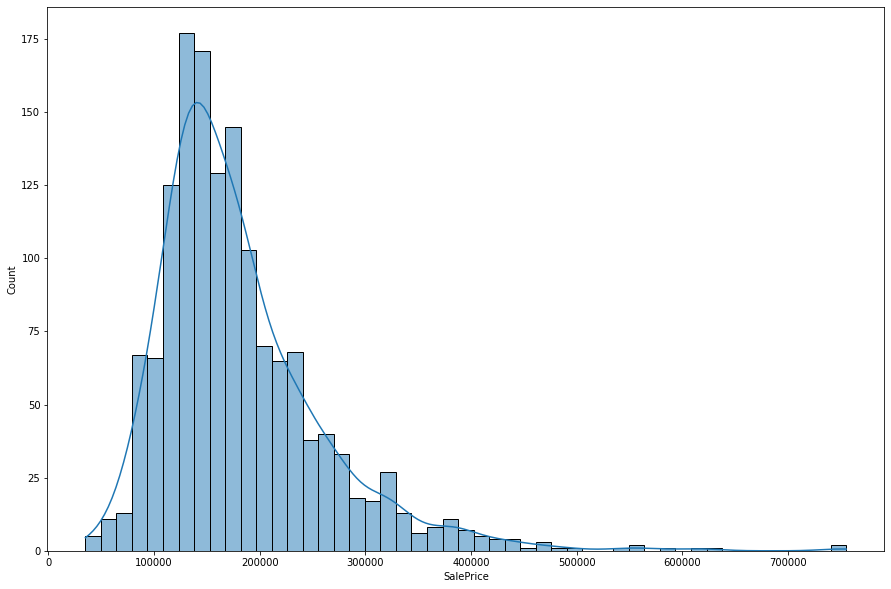

In [10]:
plt.figure(figsize=(15,10))
sns.histplot(train['SalePrice'],kde=True);

We have several outliers in the target variable, we can use the **log transformation** to normalize, but first let's look at **probplot**

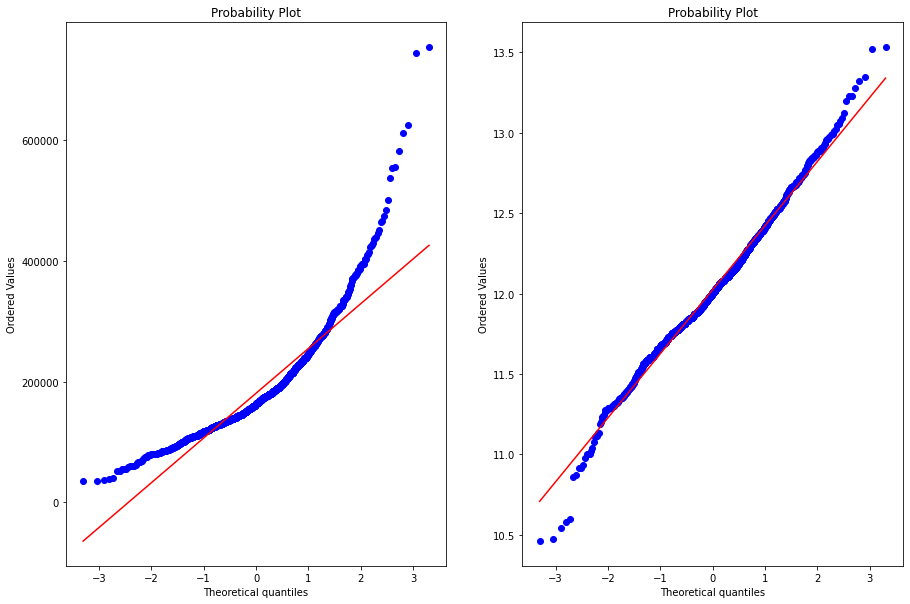

In [11]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(1,2,1)
res = stats.probplot(train['SalePrice'], plot=plt)
fig.add_subplot(1,2,2)
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

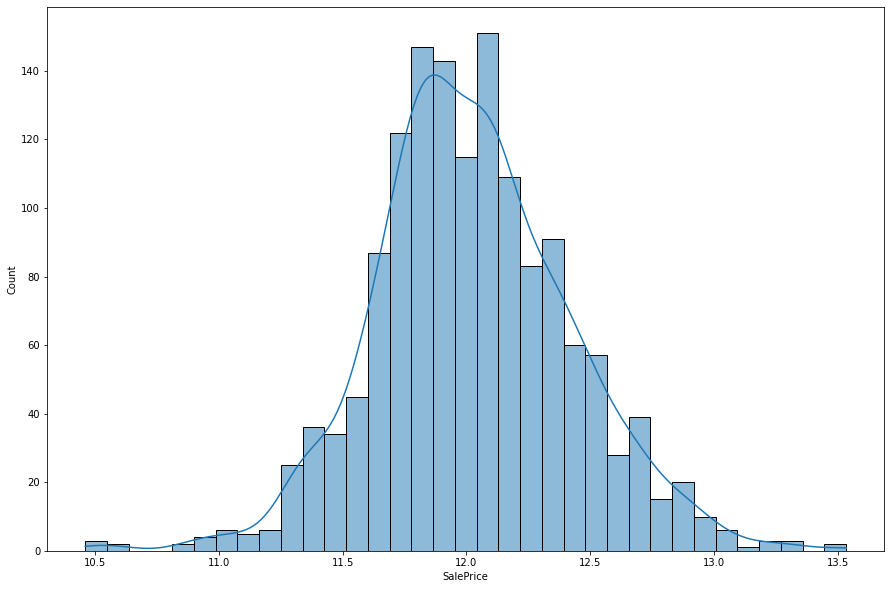

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(np.log(train['SalePrice']),kde=True);

The target variable is now **normally distributed**

In [13]:
train['SalePrice'] = np.log(train['SalePrice'])

Let's look at the **correlation matrix**

I won't use annot=True in the heatmap settings as the numbers will overlap and the visualization won't be readable, instead I'll just set the threshold by which we look at the correlation, for example 0.5.

In order not to miss the negative correlation, we apply abs to matrix

Next, I will numerically derive the most important relationships with the target variable and their true values.

In [14]:
main_corr_map = abs(train.corr())>0.5

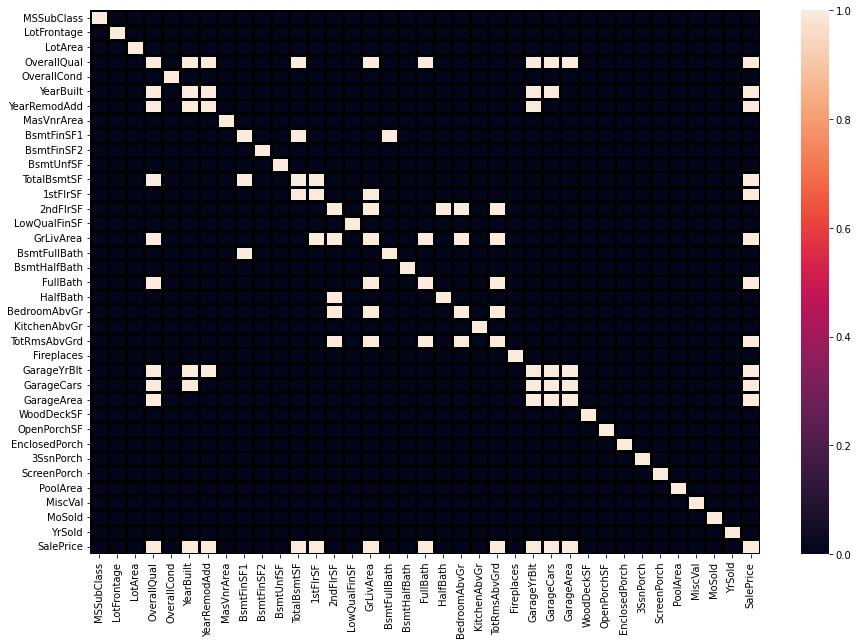

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(main_corr_map, linewidths=3, linecolor='black');

We have selected **11** variables that are most correlated with the target, let's study them

In [16]:
main_corr = train.corr()['SalePrice'][abs(train.corr())['SalePrice']>0.5].head(11).sort_values(ascending=False)
main_corr

OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64

In [17]:
main_corr_name = list(main_corr.index)

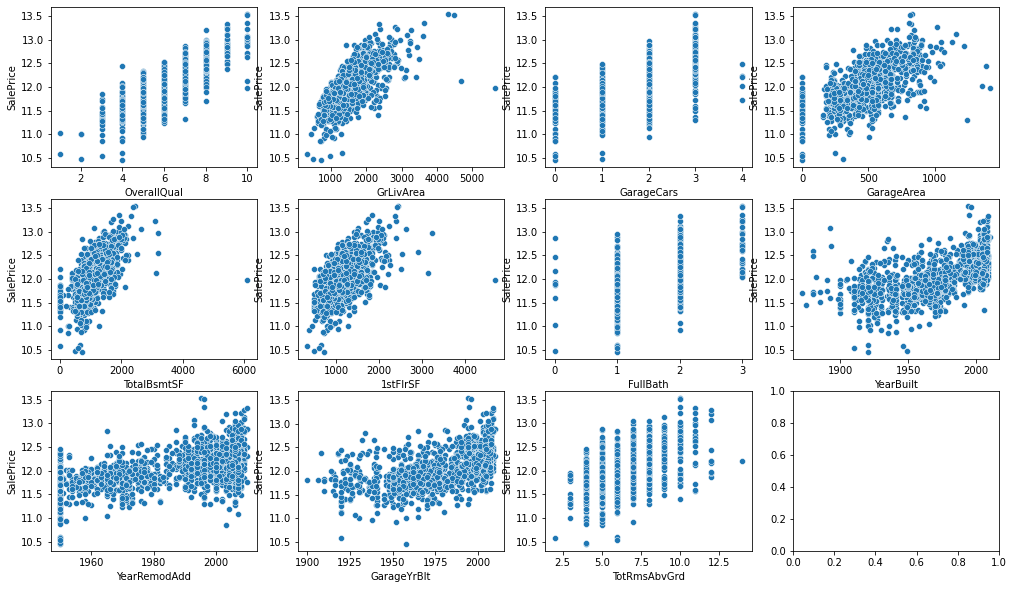

In [18]:
fig, ax =plt.subplots(3,4, figsize=(17,10))
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[0], ax=ax[0,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[1], ax=ax[0,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[2], ax=ax[0,2])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[3], ax=ax[0,3])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[4], ax=ax[1,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[5], ax=ax[1,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[6], ax=ax[1,2])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[7], ax=ax[1,3])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[8], ax=ax[2,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[9], ax=ax[2,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[10], ax=ax[2,2]);

Indeed, there is an almost linear positive relationship with many variables

On several scatterplots, such as **TotalBsmtSF**, **GrLivArea**, **TotRmsAbvGrd**, **GarageArea**, outliers are visible that can greatly affect the correlation with the target variable, you need to remove them

In [19]:
train.drop(train[train['TotalBsmtSF']>6000].index, inplace=True)
train.drop(train[train['GrLivArea']>4500].index, inplace=True)
train.drop(train[train['TotRmsAbvGrd']>12.5].index, inplace=True)
train.drop(train[train['GarageArea']>1220].index, inplace=True)

Now let's look again at how the correlation with the target variable has changed

In [20]:
after_main_corr = train.corr()['SalePrice'][abs(train.corr())['SalePrice']>0.5].head(11).sort_values(ascending=False)
after_main_corr

OverallQual     0.821573
GrLivArea       0.727028
GarageCars      0.688405
GarageArea      0.671898
TotalBsmtSF     0.647635
1stFlrSF        0.620393
FullBath        0.595443
YearBuilt       0.587536
YearRemodAdd    0.564705
GarageYrBlt     0.542986
TotRmsAbvGrd    0.540231
Name: SalePrice, dtype: float64

In [21]:
after_main_corr - main_corr

OverallQual     0.004389
GrLivArea       0.026101
GarageCars      0.007780
GarageArea      0.021011
TotalBsmtSF     0.035501
1stFlrSF        0.023412
FullBath        0.000673
YearBuilt       0.000965
YearRemodAdd   -0.000903
GarageYrBlt     0.001914
TotRmsAbvGrd    0.005809
Name: SalePrice, dtype: float64

The correlation has not increased much, but in any case, outliers are not desirable and they need to be removed

Take another look at the scatterplots without outliers

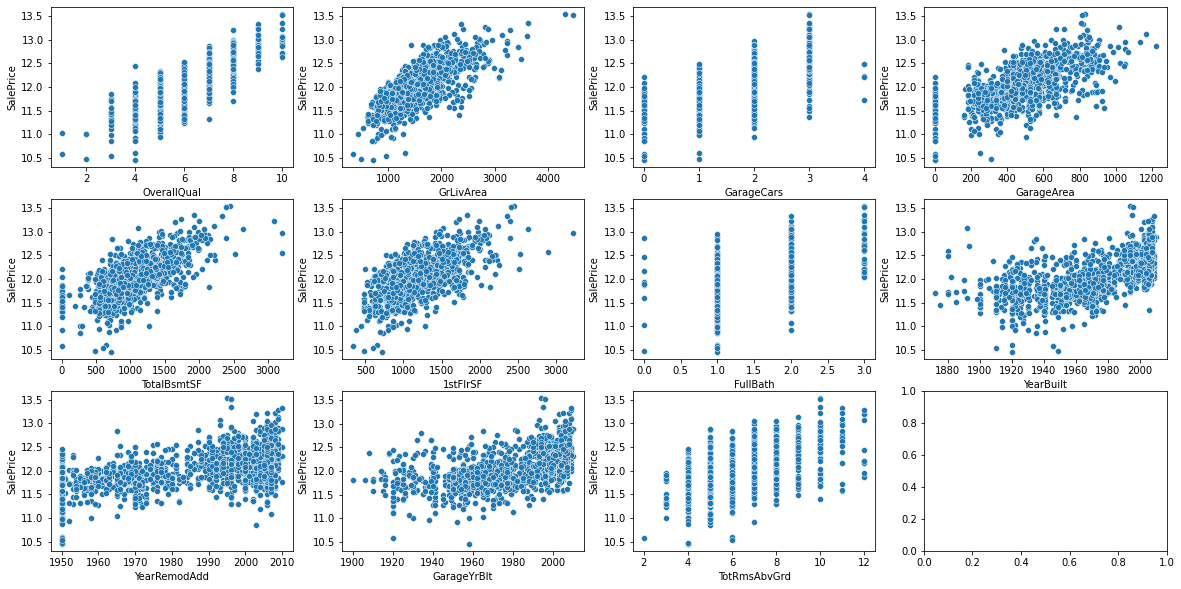

In [22]:
fig, ax =plt.subplots(3,4, figsize=(20,10))
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[0], ax=ax[0,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[1], ax=ax[0,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[2], ax=ax[0,2])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[3], ax=ax[0,3])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[4], ax=ax[1,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[5], ax=ax[1,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[6], ax=ax[1,2])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[7], ax=ax[1,3])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[8], ax=ax[2,0])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[9], ax=ax[2,1])
sns.scatterplot(data=train, y='SalePrice', x=main_corr_name[10], ax=ax[2,2]);

Looks better than it was

As we observed in the correlation matrix, many variables correlate not only with the target variable, but also with each other, such relationships may well be multicollinearity, which will damage our future model.

# Analysis of nominative variables

Let's have a look at the correlation matrix again, but increase the correlation selection threshold to 0.65 to catch linear relationships between variables

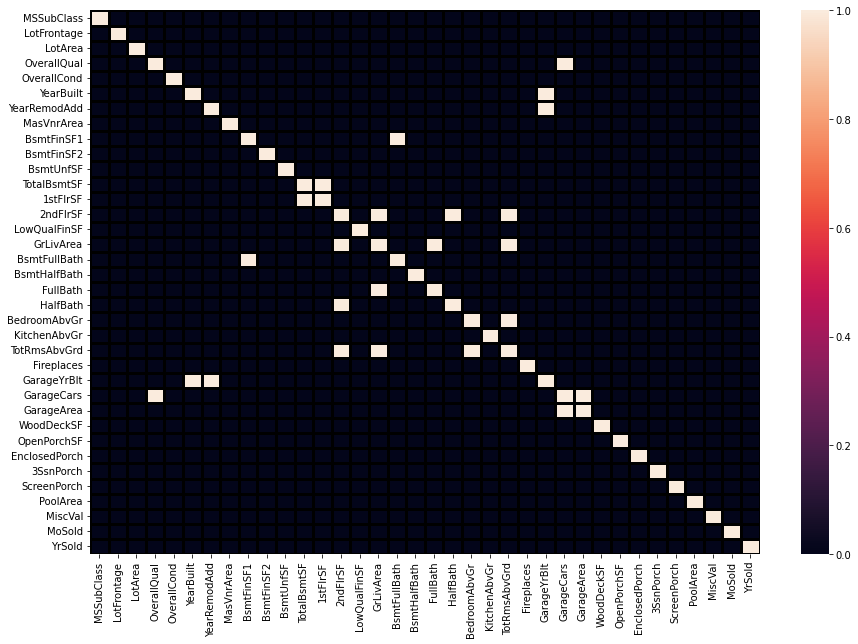

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(train.drop(['SalePrice'], axis=1).corr())>0.6, linewidths=3, linecolor='black');

Let's analyze each relationship separately, in the future I use PCA to eliminate multicollinearity, but for analysis it is worth looking at them in more detail

In [24]:
train.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 1stFlrSF :TotalBsmtSF

**1stFlrSF**: First Floor square feet

**TotalBsmtSF**: Total square feet of basement area

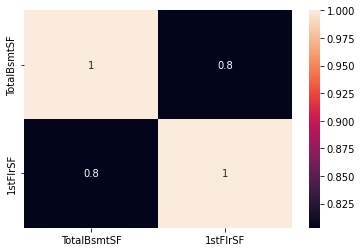

In [25]:
sns.heatmap(train[['TotalBsmtSF','1stFlrSF']].corr(), annot=True);

It is logical to assume that the relationship between these variables is **natural**, because the size of the basement will obviously depend on the size of the 1st floor of the house, but let's make sure of this and see the plots

-------------

First, let's build a boxplot for each variable

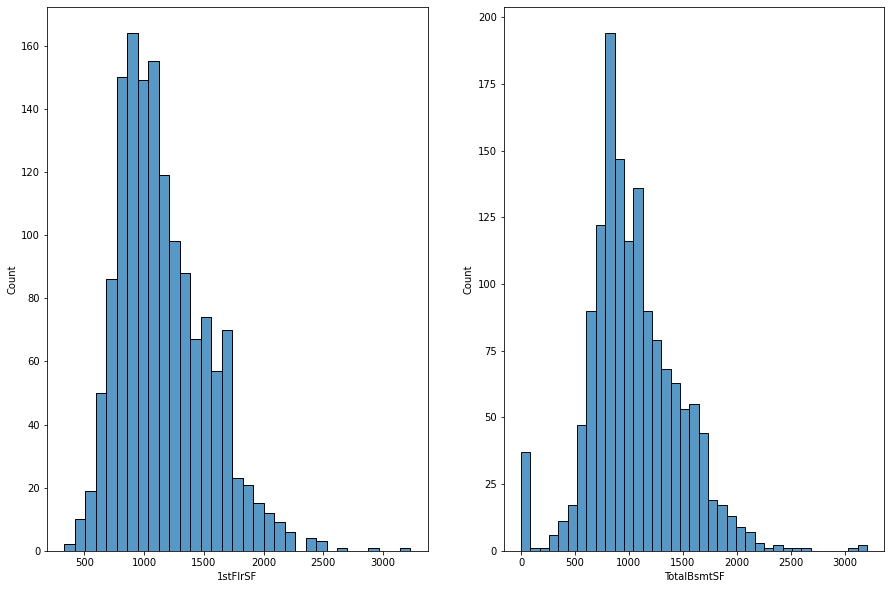

In [26]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.histplot(data= train, x='1stFlrSF', ax=ax[0])
sns.histplot(data= train, x='TotalBsmtSF', ax=ax[1]);

We see that the distribution of these variables is not normal due to values more than 2500, as well as due to the high number of values where there is no basement in the houses

However, you can apply a **log transformation to 1stFlrSF**, thereby possibly improving the linear relationship with the target variable and trying to get rid of it between these two features manually, but before that let's look at the scatterplot

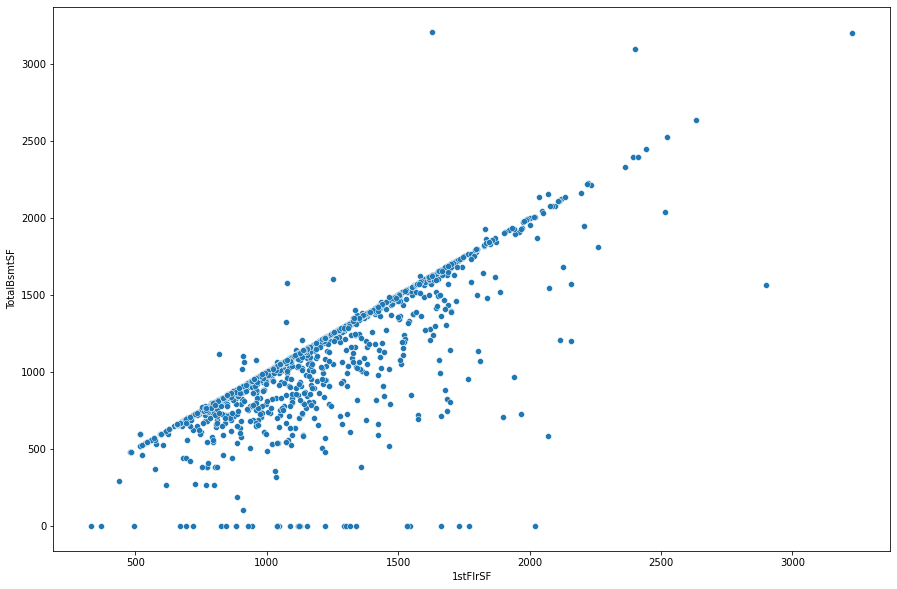

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=train, x='1stFlrSF', y='TotalBsmtSF');

We see a direct linear relationship between these features, not counting the values of 0 and a few outliers

----------------------------

To **generate new features**, you can add a new categorical feature responsible for the presence of a basement in the house, becouse see a lot of values equal to 0

In [28]:
train['CheckBsmt'] = train['TotalBsmtSF'].apply(lambda x: 0 if x==0  else 1)
test['CheckBsmt'] = test['TotalBsmtSF'].apply(lambda x: 0 if x==0  else 1)

And also apply the log transformation to **1stFlrSF**

In [29]:
train['1stFlrSF'] = np.log(train['1stFlrSF'] )

### 2ndFlrSF : GrLivArea, HalfBath, TotRmsAbvGrd

**2ndFlrSF**: Second floor square feet

**GrLivArea**: Above grade (ground) living area square feet

**HalfBath**: Half baths above grade

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)


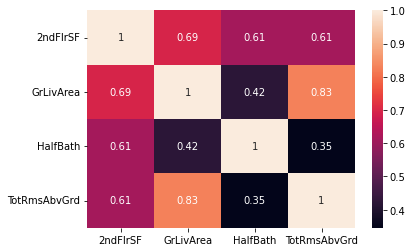

In [30]:
sns.heatmap(train[['2ndFlrSF','GrLivArea','HalfBath', 'TotRmsAbvGrd']].corr(), annot=True);

This variable correlates with three at once, it may be worth removing it, but first, let's look at the relationships

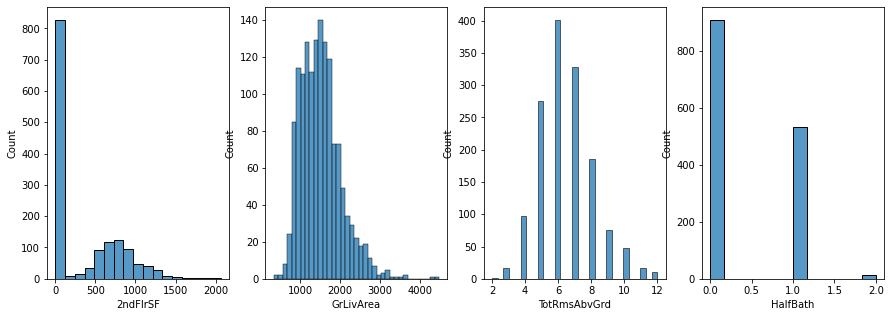

In [31]:
fig, ax =plt.subplots(1,4, figsize=(15,5))
sns.histplot(data= train, x='2ndFlrSF', ax=ax[0])
sns.histplot(data= train, x='GrLivArea', ax=ax[1]);
sns.histplot(data= train, x='TotRmsAbvGrd', ax=ax[2]);
sns.histplot(data= train, x='HalfBath', ax=ax[3]);

A variable that correlates with all the others in the same way as **TotalBsmtSF**, which we analyzed earlier, is responsible for the area. In this case, for the area of 2 floors, **we can generate another new feature** that is responsible for the presence of 2 floors in the house

**GrLivArea**, you can see that the feature is not normally distributed, but you can **apply a log transformation**

**TotRmsAbvGrd** seems to be quite an important variable for the number of rooms in the entire house, not including bathrooms.

While the **correlation between 2ndFlrSF and HalfBath is not clear**, it is possible that the presence of 2 floors directly affects the class of the bath in the house

----------------------

It makes sense to look at the scatterplot only for **2ndFlrSF** and **GrLivArea**, the rest of the signs are categorical and the scatterplot will not bring much information

Let's also look at **GrLivArea** and **TotRmsAbvGrd**, as there is a very strong correlation

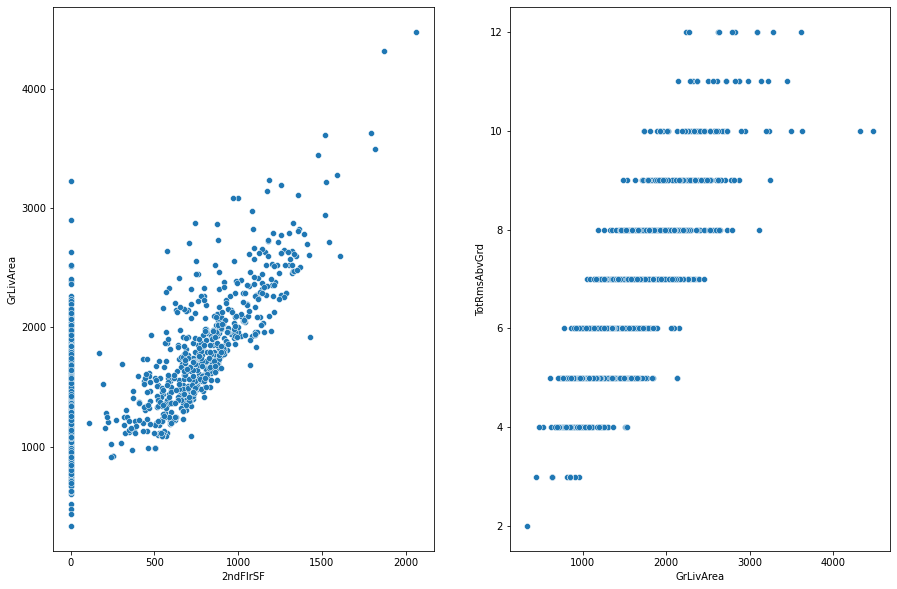

In [32]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.scatterplot(data=train, x='2ndFlrSF', y='GrLivArea', ax=ax[0]);
sns.scatterplot(data=train, x='GrLivArea', y='TotRmsAbvGrd', ax=ax[1]);

Scatteplot shows a direct linear relationship, ignoring 0 values

As mentioned above, let's create a new feature that is responsible for the presence of 2 floors in the house

In [33]:
train['Check2ndFlr'] = train['2ndFlrSF'].apply(lambda x: 0 if x==0  else 1)
test['Check2ndFlr'] = test['2ndFlrSF'].apply(lambda x: 0 if x==0  else 1)
train['GrLivArea'] = np.log(train['GrLivArea'] )

### BsmtFullBath : BsmtFinSF1
### TotRmsAbvGrd : BedroomAbvGr
### GarageYrBlt: YearBuilt, YearRemodAdd

**BsmtFullBath**: Basement full bathrooms

**BsmtFinSF1**: Type 1 finished square feet

-----------

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Bedroom**: Number of bedrooms above basement level


-------------

**GarageYrBlt**: Year garage was built

**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date




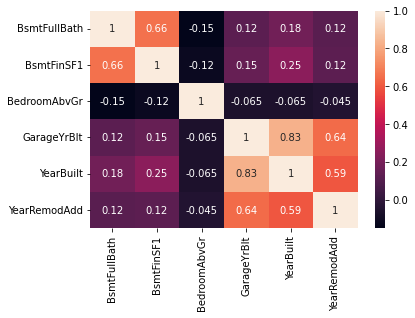

In [34]:
sns.heatmap(train[['BsmtFullBath','BsmtFinSF1','BedroomAbvGr', 'GarageYrBlt','YearBuilt','YearRemodAdd']].corr(), annot=True);

Each of these variables is quite logically correlated with others, let's look at them

TotRmsAbvGrd we analyzed earlier

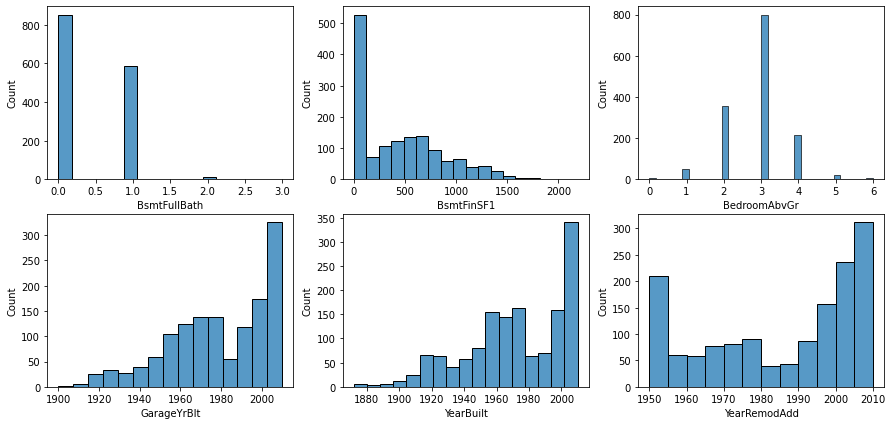

In [35]:
fig, ax =plt.subplots(2,3, figsize=(15,7))
sns.histplot(data= train, x='BsmtFullBath', ax=ax[0,0])
sns.histplot(data= train, x='BsmtFinSF1', ax=ax[0,1]);
sns.histplot(data= train, x='BedroomAbvGr', ax=ax[0,2]);
sns.histplot(data= train, x='GarageYrBlt', ax=ax[1,0]);
sns.histplot(data= train, x='YearBuilt', ax=ax[1,1])
sns.histplot(data= train, x='YearRemodAdd', ax=ax[1,2]);


For BsmtFinSF1, we will do the same as with **TotalBsmtSF** and **2ndFlrSF**, we **will create the CheckBsmtFin feature**

YearBuilt seems to be the most important variable of the 3, but **we can create a new feature** that counts the difference between the time the house was built and when it was repaired.

In [36]:
train['CheckBsmtFin'] = train['BsmtFinSF1'].apply(lambda x: 0 if x==0  else 1)
test['CheckBsmtFin'] = test['BsmtFinSF1'].apply(lambda x: 0 if x==0  else 1)

In [37]:
train['YearDifference'] = train['YearRemodAdd'] - train['YearBuilt']
test['YearDifference'] = test['YearRemodAdd'] - test['YearBuilt']

In [38]:
train['YearDifference'].unique()

array([  0,   1,  55,   2,  19,  11,  72,   7,  20,  33,  49,  40,  23,
        30,  36,  54,   5,  88,  16,   6,  76,  29,  24,  35,  53,  71,
        67,  85, 110,  86,  18,  57,  47,  43,  25,  62,  14,  15,  27,
        26,  78,  59,  38,   9,  51,  83, 101,  32,   3,  39,  10,  52,
        50,   8,  48,  79,  58,  82,  17, 122,  65,  34,  75,  60,  42,
        77,  28,  22,  61,  46,  89,  80,  13,  63,  90,  70,  37, 100,
        44,   4,  81, 107,  21,  64, 111,  69,  31,  68,  96, 108,  56,
        92, 123,  94,  45,  87,  41,  74,  98,  12, 103, 106,  93, 104,
        73, 121, 115,  95,  84])

### GarageCars : GarageArea

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

Both variables almost repeat each other, the logic of using two such variables at once is not entirely clear, let's delete one of them

We will also **create a new feature** responsible for the presence of a garage in the house

In [39]:
train['CheckGarage'] = train['GarageArea'].apply(lambda x: 0 if x==0 else 1)
test['CheckGarage'] = test['GarageArea'].apply(lambda x: 0 if x==0 else 1)

train.drop(['GarageCars'],axis=1, inplace=True)
test.drop(['GarageCars'],axis=1, inplace=True)

Great, we have looked at all the significant relationships between the nominal variables, it may be worth looking into the remaining nominative features in more detail and trying to generate even more new features, but we will do this another time

However, I **will add one feature that immediately catches your eye after studying and generating the 3 previous ones** - the total area of the house, add it and deal with categorical features

In [40]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

Now let's get into the analysis of categorical features

# Analysis of categorical variables

In [41]:
train_object = train.select_dtypes(include=['object'])

In [42]:
train_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


In [43]:
train_object.describe().T

,count,unique,top,freq
MSZoning,1454,5,RL,1147
Street,1454,2,Pave,1449
Alley,1454,3,No,1364
LotShape,1454,4,Reg,921
LandContour,1454,4,Lvl,1310
Utilities,1454,2,AllPub,1453
LotConfig,1454,5,Inside,1047
LandSlope,1454,3,Gtl,1377
Neighborhood,1454,25,NAmes,225
Condition1,1454,9,Norm,1257


We can see feture in which one of the classes of the feture strongly predominates

For example **Utilities** has a ratio of 1453:1

Such feature will not help us much, so we will remove those in which more than 90% is dominated by one class

In [44]:
train_object.shape[1]

43

In [45]:
check_object = []
for col in train_object.columns:
    if train_object[col].value_counts().values[0]>train_object.shape[0]*0.9:
        check_object.append(col)
train.drop(check_object, axis=1, inplace=True)
test.drop(check_object, axis=1, inplace=True)

In [46]:
train_object = train.select_dtypes(include=['object'])
train_object.shape[1]

28

In [47]:
train_object.describe().T

,count,unique,top,freq
MSZoning,1454,5,RL,1147
LotShape,1454,4,Reg,921
LotConfig,1454,5,Inside,1047
Neighborhood,1454,25,NAmes,225
Condition1,1454,9,Norm,1257
BldgType,1454,5,1Fam,1216
HouseStyle,1454,8,1Story,723
RoofStyle,1454,6,Gable,1139
Exterior1st,1454,15,VinylSd,513
Exterior2nd,1454,16,VinylSd,502


Great, but we still have a lot of categorical variables

Let's look at the boxplot for each and analyze the effect on the target variable

To make the visualization process more convenient, we divide the object variables into 5 equal parts

**Neighborhood**, **Exterior1st**, **Exterior2nd**, **Condition1**, **SaleType**, **HouseStyle** visualize separately as they have many classes

### Neighborhood, Exterior1st, Exterior2nd, Condition1, SaleType, HouseStyle

#### Exterior1st, Exterior2nd

**Exterior1st**: Exterior covering on house

**Exterior2nd**: Exterior covering on house (if more than one material)

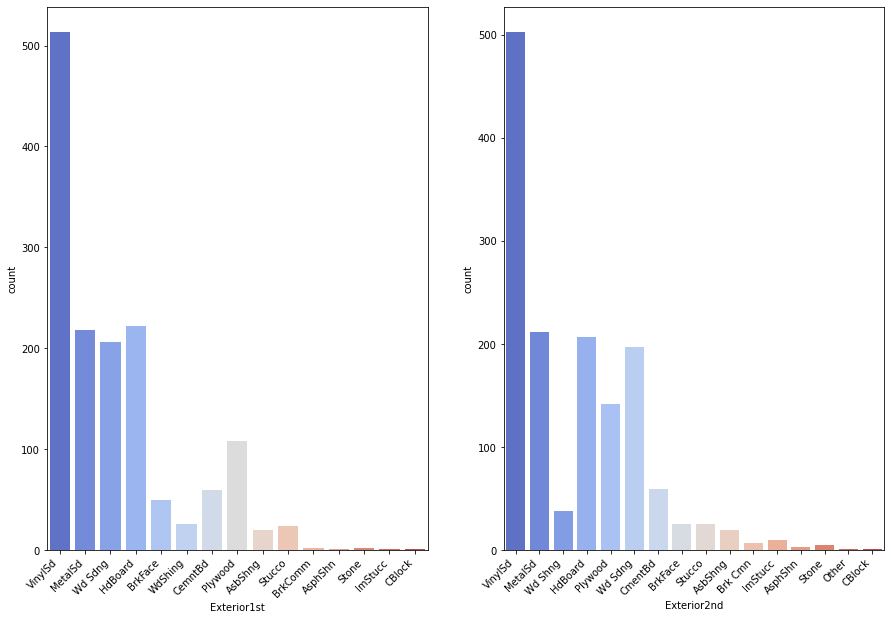

In [48]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.countplot(data=train, x='Exterior1st', palette='coolwarm', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.countplot(data=train, x='Exterior2nd',  palette='coolwarm', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right');

Each of these classes has one of the most popular **Vinyls** class and about 3-4 equally distributed classes which are half  smaller than the most popular class, the other classes are rare

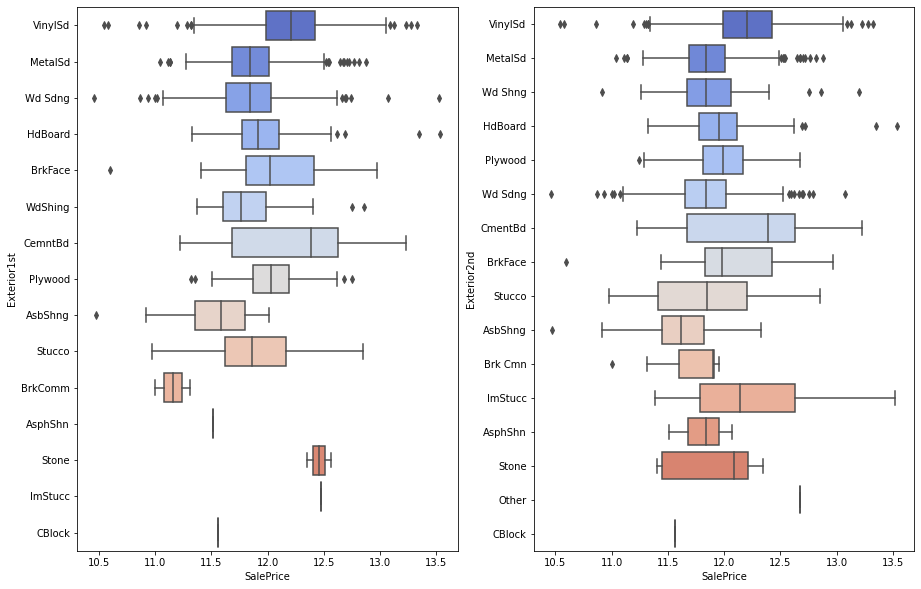

In [49]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data= train, y='Exterior1st', x='SalePrice', palette='coolwarm', ax=ax[0])
sns.boxplot(data= train, y='Exterior2nd', x='SalePrice', palette='coolwarm', ax=ax[1]);

It can be seen that the type of class affects the Sale Price, for example, the **VinylSd** box expresses the high cost of the house more strongly than **MetalSD** or **Wd Shng**, even though they fall into the VinylSd whiskers zone

#### Neighborhood

**Neighborhood**: Physical locations within Ames city limits

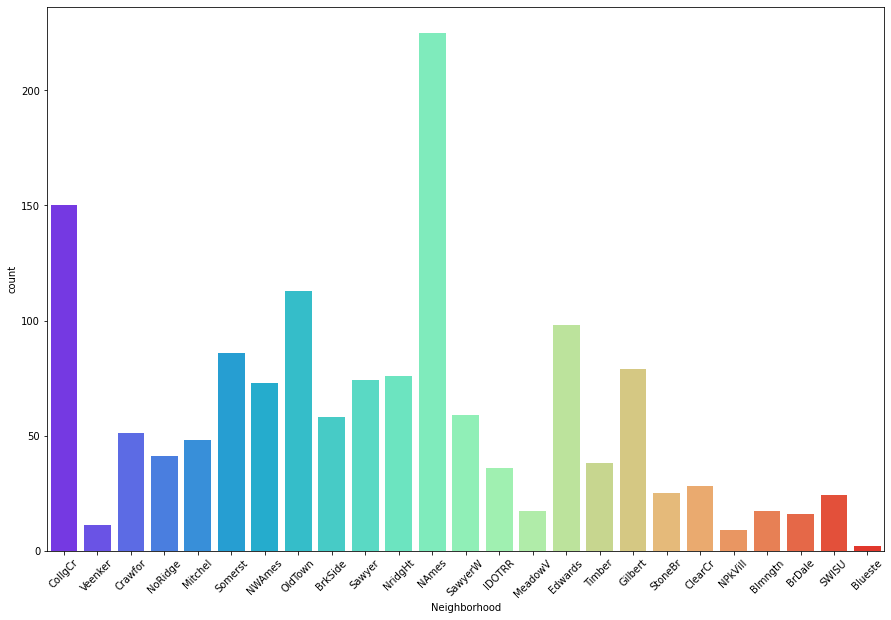

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(data=train, x='Neighborhood', palette='rainbow')
plt.xticks(rotation=45);

The **NAmes** class is more common than the others, but there is no strong imbalance, the rest of the classes are about the same

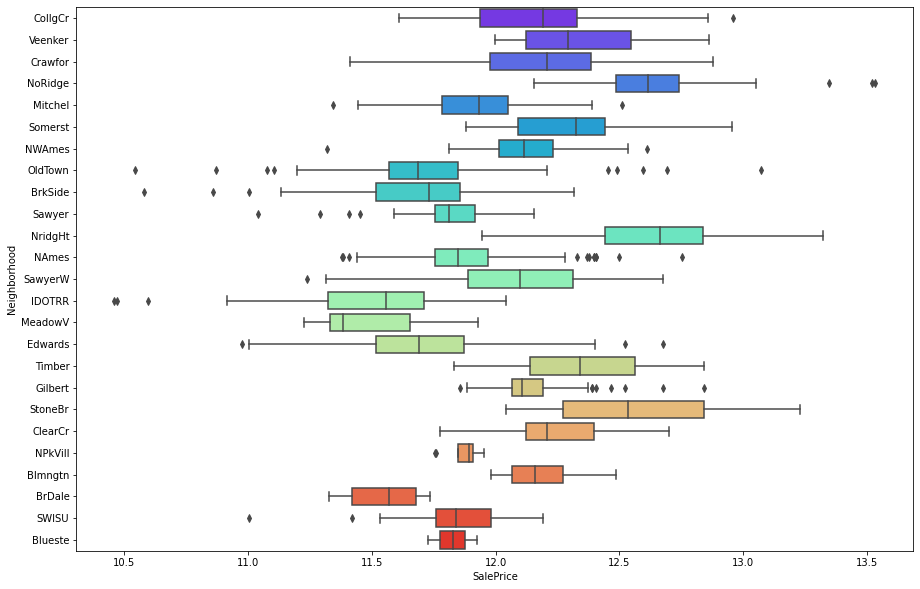

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(data= train, y='Neighborhood', palette='rainbow', x='SalePrice');

This variable strongly affects the target one, for example, **NoRidge** and **Mitchell** have approximately the same class distribution, but **SalePrice** is very different for them

#### Condition1

**Condition1**: Proximity to main road or railroad

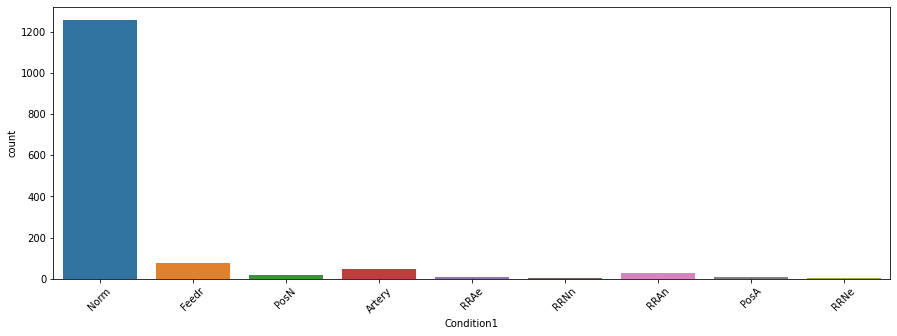

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Condition1')
plt.xticks(rotation=45);

There is a strong class imbalance, **Norm** is more common than the rest

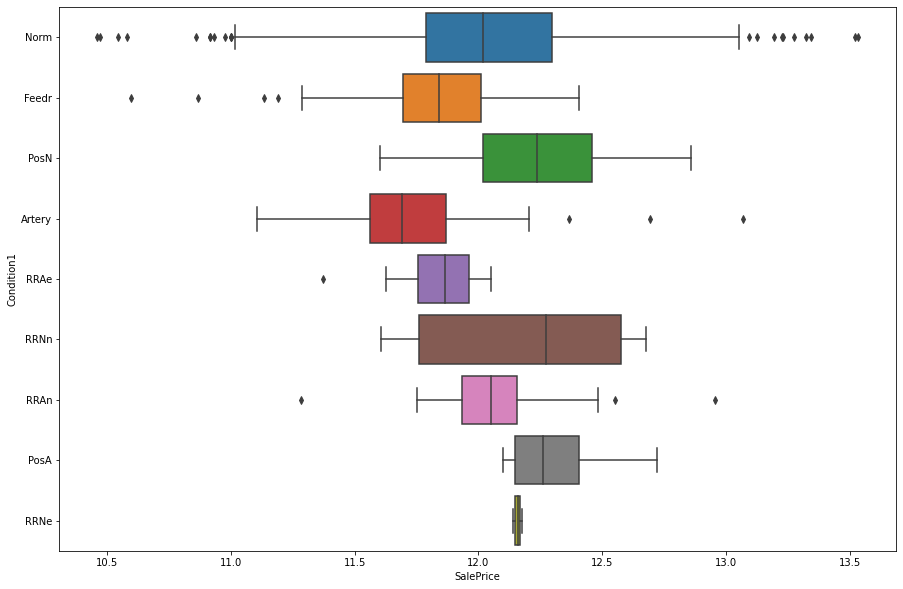

In [53]:
plt.figure(figsize=(15,10))
sns.boxplot(data= train, y='Condition1', x='SalePrice');

All other classes fall into the **Norm** whisker zone

#### SaleType, HouseStyle

**SaleType**: Type of sale

**HouseStyle**: Style of dwelling

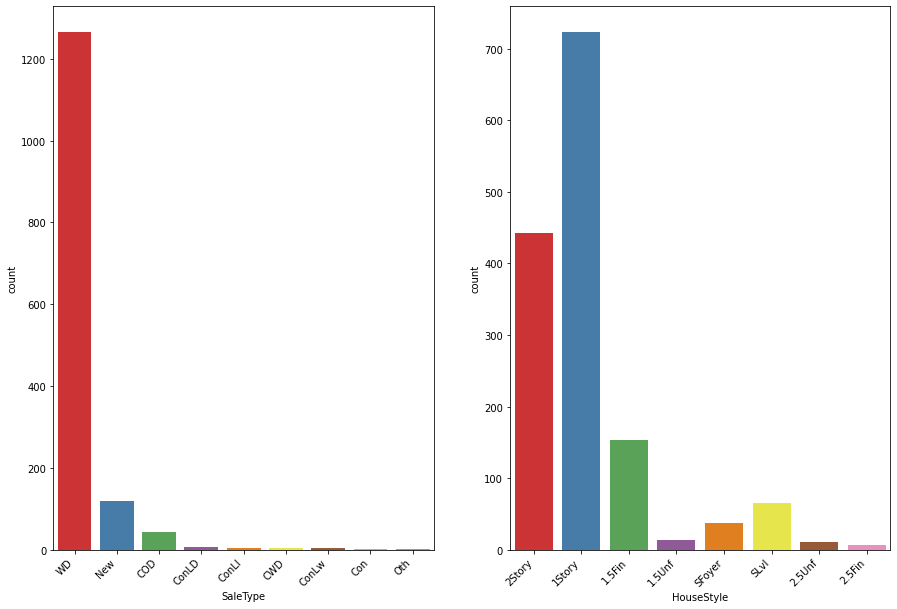

In [54]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.countplot(data=train, x='SaleType', palette='Set1', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.countplot(data=train, x='HouseStyle', palette='Set1', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right');

**SaleType** has an imbalance of classes, **WD** prevails

**HouseStyle** has two classes 1-2 Story, more often found above the rest

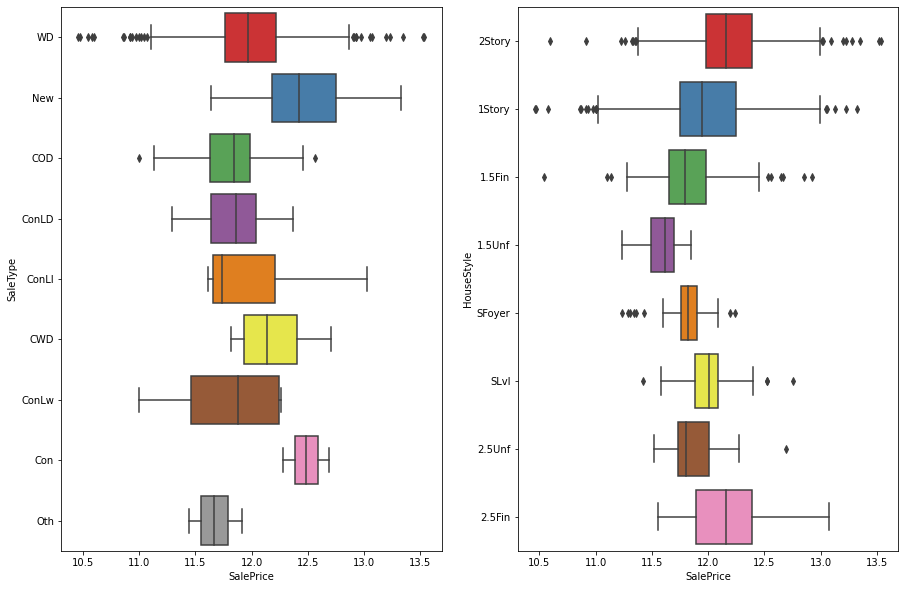

In [55]:
fig, ax =plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data= train, y='SaleType', x='SalePrice', palette='Set1', ax=ax[0])
sns.boxplot(data= train, y='HouseStyle', x='SalePrice', palette='Set1', ax=ax[1]);

The **WD** and **New** classes in the **SaleType** class have different effects on the target variable, although the **New** class is less common in the data, but it definitely has a dependency on **SalePrice**

In **HouseStyle**, the 3 most popular classes describe the **Sale Price** well

Great, after analyzing all the selected variables, it can be said that the **Neighborhood** has the greatest influence on the price of a house.

Now let's look at the rest of the variables, but let's make it faster and more compact.

As I said above, we will divide the remaining variables into 5 parts and look at them

### Other categorical columns

In [56]:
train_object = train_object.drop(
    ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'Condition1', 'SaleType', 'HouseStyle'],
    axis = 1)

In [57]:
object_part_1 = train_object.columns.to_list()[0:5]
object_part_2 = train_object.columns.to_list()[5:9]
object_part_3 = train_object.columns.to_list()[9:13]
object_part_4 = train_object.columns.to_list()[13:17]
object_part_5 = train_object.columns.to_list()[17:]

#### part_1

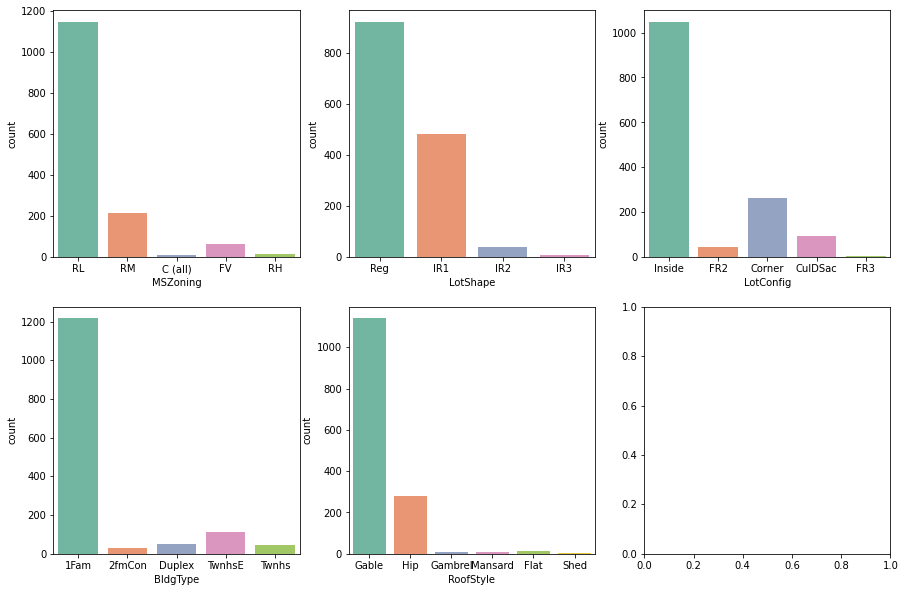

In [58]:
fig, ax =plt.subplots(2,3, figsize=(15,10))
sns.countplot(data=train, x=object_part_1[0], palette='Set2', ax=ax[0,0])
sns.countplot(data=train, x=object_part_1[1], palette='Set2', ax=ax[0,1])
sns.countplot(data=train, x=object_part_1[2], palette='Set2', ax=ax[0,2])
sns.countplot(data=train, x=object_part_1[3], palette='Set2', ax=ax[1,0])
sns.countplot(data=train, x=object_part_1[4], palette='Set2', ax=ax[1,1]);

Strong imbalance of all classes, not counting **LotShape**

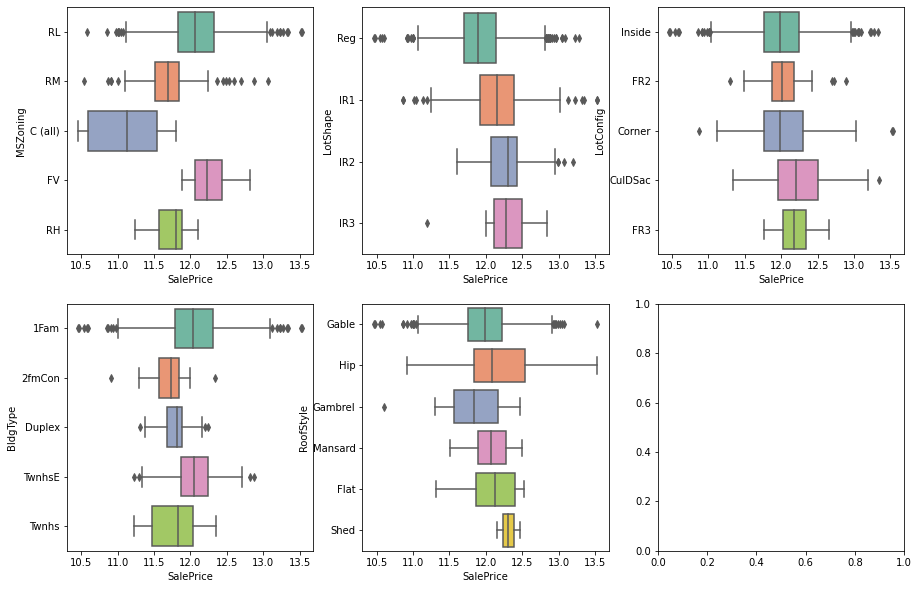

In [59]:
fig, ax =plt.subplots(2,3, figsize=(15,10))
sns.boxplot(data= train, y=object_part_1[0], x='SalePrice', palette='Set2', ax=ax[0,0])
sns.boxplot(data= train, y=object_part_1[1], x='SalePrice', palette='Set2', ax=ax[0,1])
sns.boxplot(data= train, y=object_part_1[2], x='SalePrice', palette='Set2', ax=ax[0,2])
sns.boxplot(data= train, y=object_part_1[3], x='SalePrice', palette='Set2', ax=ax[1,0])
sns.boxplot(data= train, y=object_part_1[4], x='SalePrice', palette='Set2', ax=ax[1,1]);

There is a clear influence on the price in the **MSZoning** variable, but it should be borne in mind that the **RL** class predominates

There is also a dependency in the **Lot Shape** variable

#### part_2

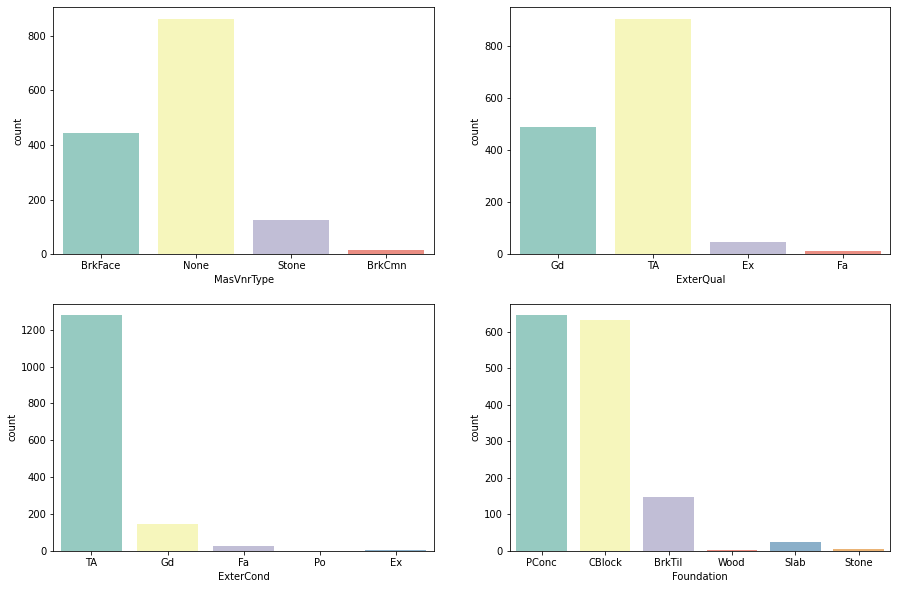

In [60]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(data=train, x=object_part_2[0], palette='Set3', ax=ax[0,0])
sns.countplot(data=train, x=object_part_2[1], palette='Set3', ax=ax[0,1])
sns.countplot(data=train, x=object_part_2[2], palette='Set3', ax=ax[1,0])
sns.countplot(data=train, x=object_part_2[3], palette='Set3', ax=ax[1,1]);

The situation is much better, the variables have an imbalance, but they have at least 2 main classes

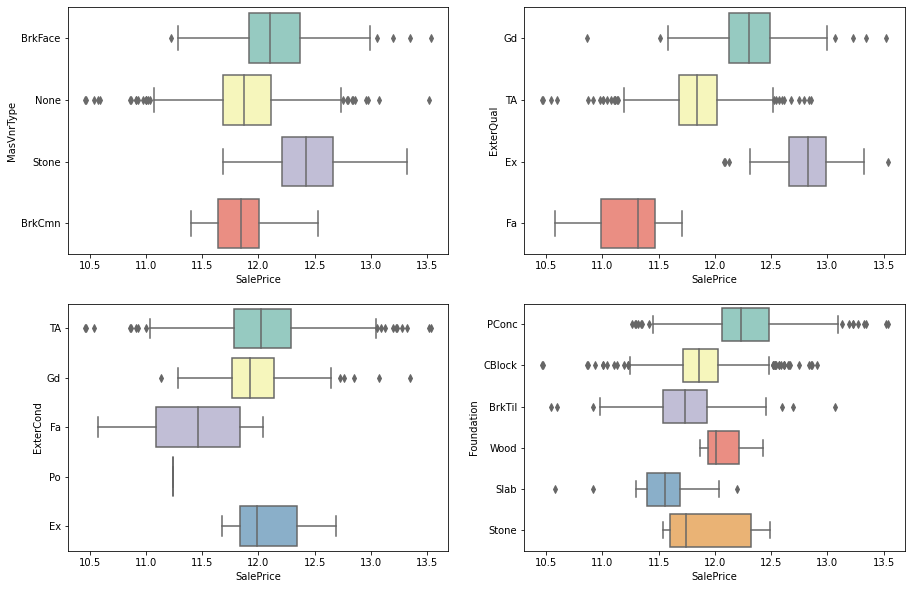

In [61]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data= train, y=object_part_2[0], x='SalePrice', palette='Set3', ax=ax[0,0])
sns.boxplot(data= train, y=object_part_2[1], x='SalePrice', palette='Set3', ax=ax[0,1])
sns.boxplot(data= train, y=object_part_2[2], x='SalePrice', palette='Set3', ax=ax[1,0])
sns.boxplot(data= train, y=object_part_2[3], x='SalePrice', palette='Set3', ax=ax[1,1]);

We can see the effect on the target variable depending on the classes, this is well expressed in **ExterQual** and **Foundation**

#### part_3

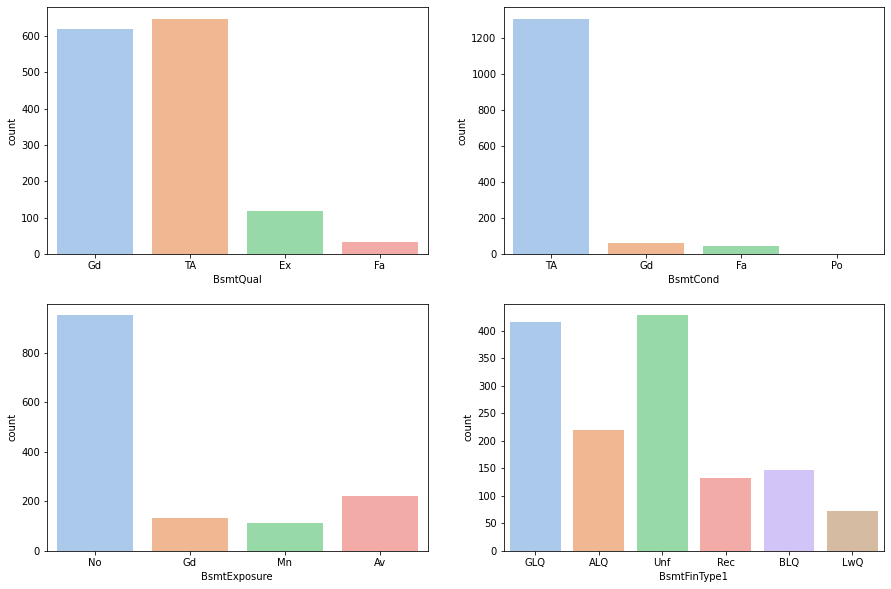

In [62]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(data=train, x=object_part_3[0], palette='pastel', ax=ax[0,0])
sns.countplot(data=train, x=object_part_3[1], palette='pastel', ax=ax[0,1])
sns.countplot(data=train, x=object_part_3[2], palette='pastel', ax=ax[1,0])
sns.countplot(data=train, x=object_part_3[3], palette='pastel', ax=ax[1,1]);

Good class distribution in **BsmtFinType1** 

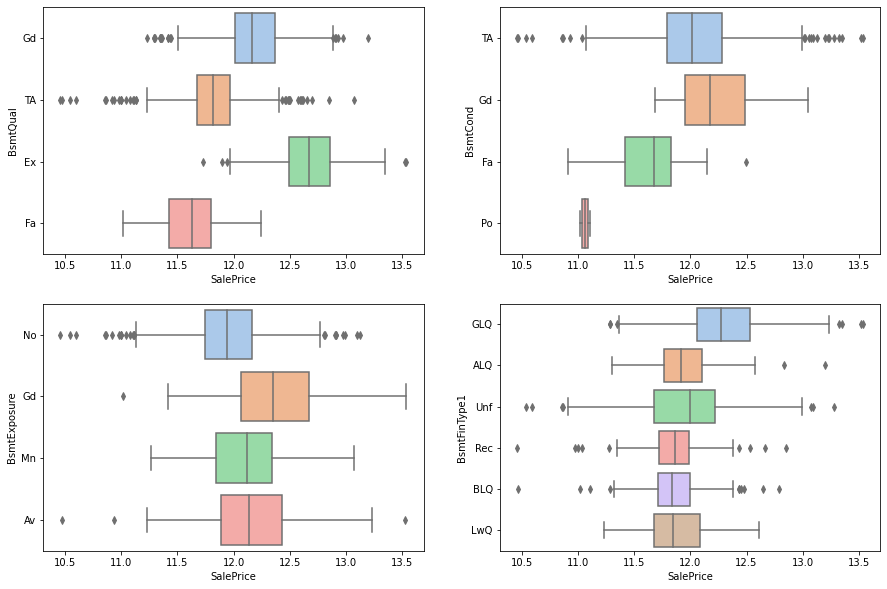

In [63]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data= train, y=object_part_3[0], x='SalePrice', palette='pastel', ax=ax[0,0])
sns.boxplot(data= train, y=object_part_3[1], x='SalePrice', palette='pastel', ax=ax[0,1])
sns.boxplot(data= train, y=object_part_3[2], x='SalePrice', palette='pastel', ax=ax[1,0])
sns.boxplot(data= train, y=object_part_3[3], x='SalePrice', palette='pastel', ax=ax[1,1]);

**BsmtQual** has a strong effect on the target variable

You can also see that with a light class balance in **BsmtFinType1**, you can see how the **GLQ** class affects the target variable

#### part_4

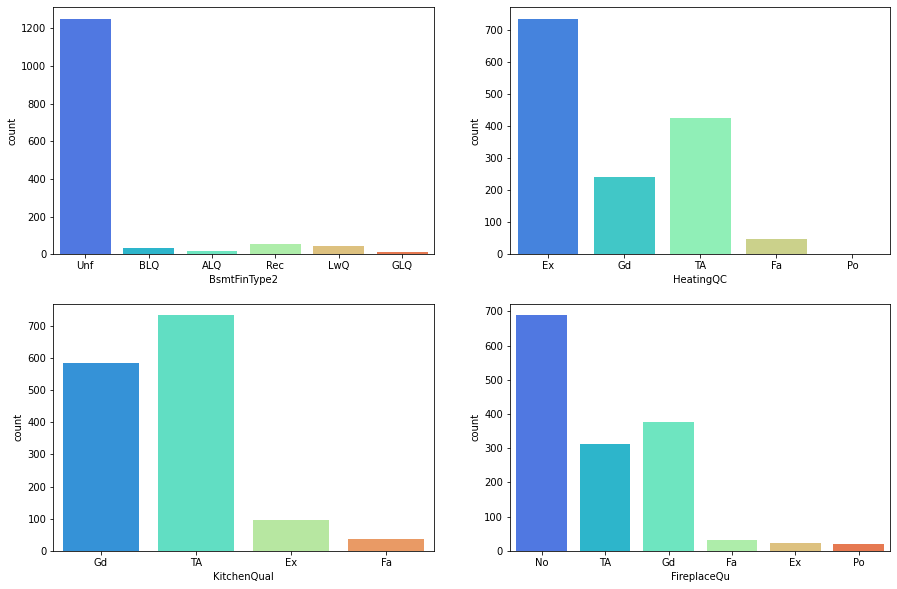

In [64]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(data=train, x=object_part_4[0], palette='rainbow', ax=ax[0,0])
sns.countplot(data=train, x=object_part_4[1], palette='rainbow', ax=ax[0,1])
sns.countplot(data=train, x=object_part_4[2], palette='rainbow', ax=ax[1,0])
sns.countplot(data=train, x=object_part_4[3], palette='rainbow', ax=ax[1,1]);

Good distribution in all variables except **BsmtFinType2**

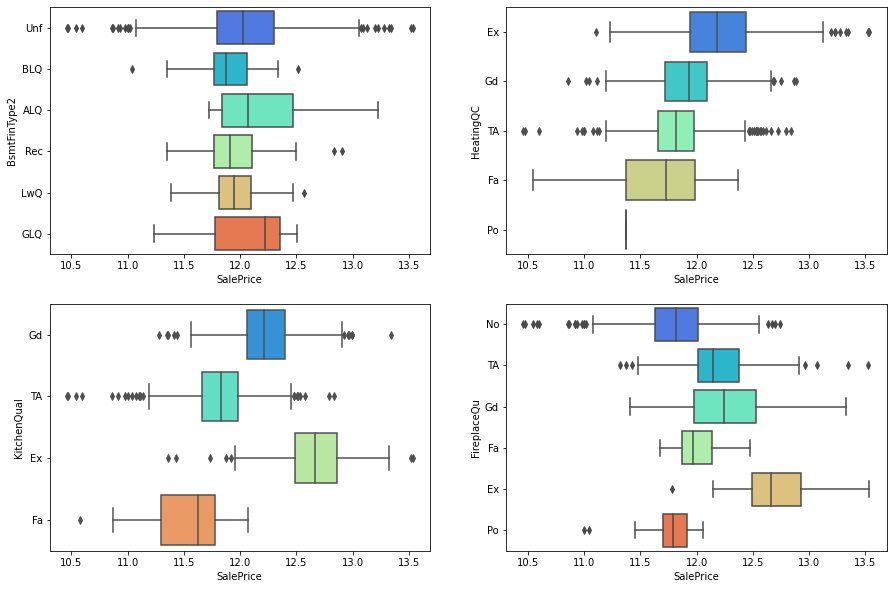

In [65]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data= train, y=object_part_4[0], x='SalePrice', palette='rainbow', ax=ax[0,0])
sns.boxplot(data= train, y=object_part_4[1], x='SalePrice', palette='rainbow', ax=ax[0,1])
sns.boxplot(data= train, y=object_part_4[2], x='SalePrice', palette='rainbow', ax=ax[1,0])
sns.boxplot(data= train, y=object_part_4[3], x='SalePrice', palette='rainbow', ax=ax[1,1]);

All variables except **BsmtFinType2** have an effect on **SalePrice**

#### part_5

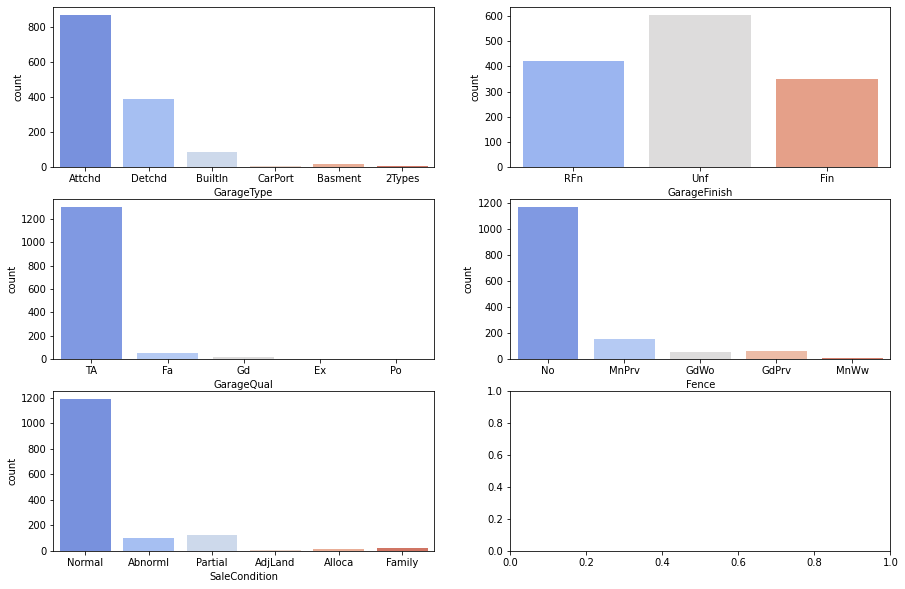

In [66]:
fig, ax =plt.subplots(3,2, figsize=(15,10))
sns.countplot(data=train, x=object_part_5[0], palette='coolwarm', ax=ax[0,0])
sns.countplot(data=train, x=object_part_5[1], palette='coolwarm', ax=ax[0,1])
sns.countplot(data=train, x=object_part_5[2], palette='coolwarm', ax=ax[1,0])
sns.countplot(data=train, x=object_part_5[3], palette='coolwarm', ax=ax[1,1]);
sns.countplot(data=train, x=object_part_5[4], palette='coolwarm', ax=ax[2,0]);

Good class distribution at **GarageFinish**

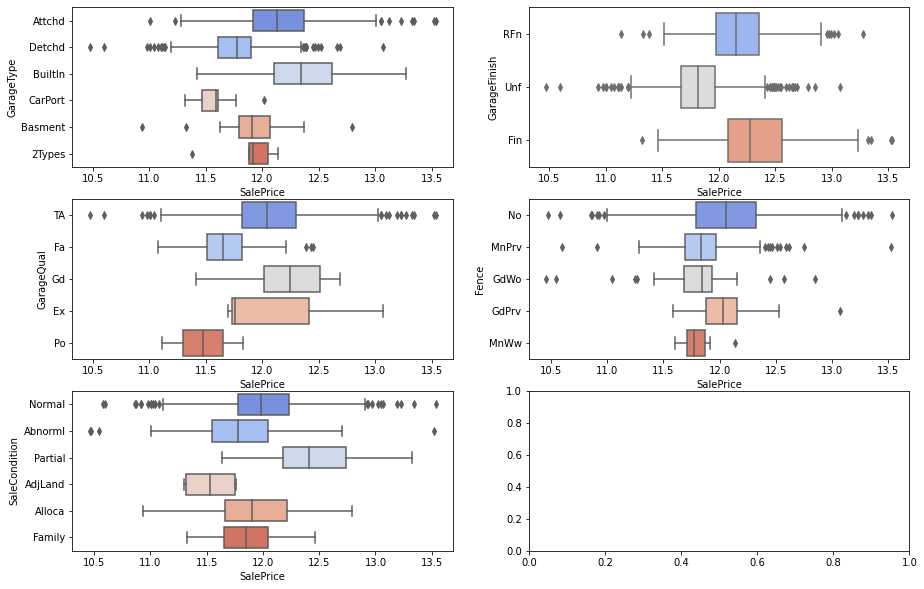

In [67]:
fig, ax =plt.subplots(3,2, figsize=(15,10))
sns.boxplot(data= train, y=object_part_5[0], x='SalePrice', palette='coolwarm', ax=ax[0,0])
sns.boxplot(data= train, y=object_part_5[1], x='SalePrice', palette='coolwarm', ax=ax[0,1])
sns.boxplot(data= train, y=object_part_5[2], x='SalePrice', palette='coolwarm', ax=ax[1,0])
sns.boxplot(data= train, y=object_part_5[3], x='SalePrice', palette='coolwarm', ax=ax[1,1]);
sns.boxplot(data= train, y=object_part_5[4], x='SalePrice', palette='coolwarm', ax=ax[2,0]);

**GarageFinish** has a good dependency

-----------------

After analyzing all the categorical variables, it can be concluded that many of them have a strong influence on the target variable.

Many variables after cleaning still have a strong imbalance, and some of them have an almost linear relationship with the target variable


Now you need to deal with the missing values in the data

# Preprocessing

# Filling in Missing Values

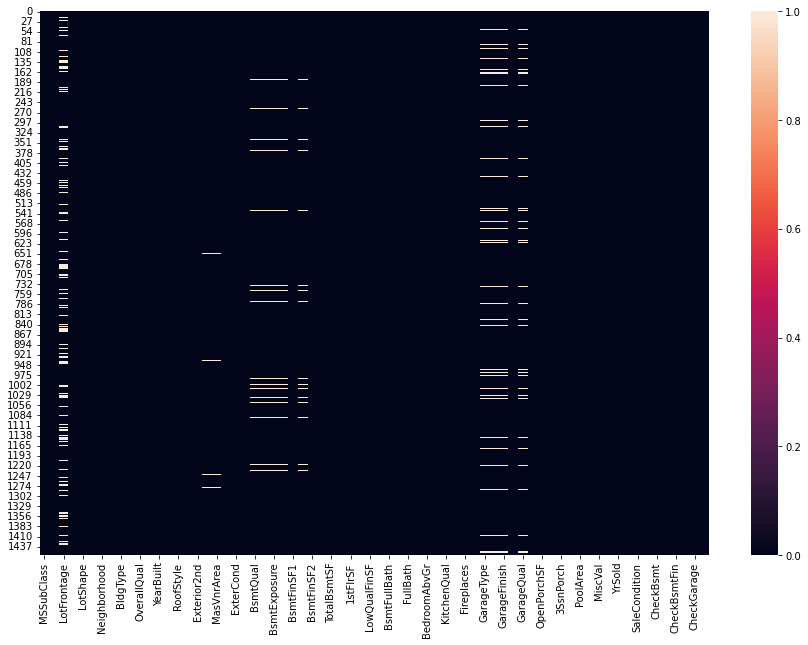

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(train.isnull());

In [69]:
train.isnull().sum().head(60)

MSSubClass         0
MSZoning           0
LotFrontage      258
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageType        80
GarageYrBlt  

There is a relationship between missings and variables

**Bsmt** have 37-38 missing values

**Garage**  have 80 missing values

**MasVnrType** and **MasVnrArea** each have 8 missing values

Let's take a look at them individually and decide what to do with them, after that we'll deal with **LotFrontage**

We will carry out all operations on train and test, if there are missings in test, we will analyze them separately

## Train

### Bsmt missing values

**BsmtQual**: Height of the basement

**BsmtCond**: General condition of the basement

**BsmtExposure**: Walkout or garden level basement walls

**BsmtFinType1**: Quality of basement finished area

**BsmtFinType2**: Quality of second finished area (if present)

In [70]:
Bsmt = train.filter(like="Bsmt")

print(
     'BsmtQual:', Bsmt.BsmtQual.unique(),
     '\nBsmtCond:', Bsmt.BsmtCond.unique(),
     '\nBsmtExposure:', Bsmt.BsmtExposure.unique(),
     '\nBsmtFinType1:', Bsmt.BsmtFinType1.unique(),
     '\nBsmtFinType2:', Bsmt.BsmtFinType2.unique()
     )

BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa'] 
BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po'] 
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan] 
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 
BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Looks like these 37-38 houses just don't have a basement

We have already introduced a variable that is responsible for the presence of a basement in the house, let's look at houses that do not have a basement

In [71]:
Bsmt[Bsmt['CheckBsmt']==0].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    37
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
CheckBsmt        0
CheckBsmtFin     0
dtype: int64

Great, these are exactly the values we were looking for, let's convert **NaN to No**, which will indicate that this parameter is missing

In [72]:
train['BsmtQual'].fillna('No', inplace=True)
train['BsmtCond'].fillna('No', inplace=True)
train['BsmtExposure'].fillna('No', inplace=True)
train['BsmtFinType1'].fillna('No', inplace=True)
train['BsmtFinType2'].fillna('No', inplace=True)

test['BsmtQual'].fillna('No', inplace=True)
test['BsmtCond'].fillna('No', inplace=True)
test['BsmtExposure'].fillna('No', inplace=True)
test['BsmtFinType1'].fillna('No', inplace=True)
test['BsmtFinType2'].fillna('No', inplace=True)

Bsmt = train.filter(like="Bsmt")
Bsmt.isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
CheckBsmt       0
CheckBsmtFin    0
dtype: int64

Great, now let's look at the **Garage**, but I'm sure the missing values are due to the fact that the garage is missing

### Garage missing values 

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageQual**: Garage quality


In [73]:
Garage = train.filter(like="Garage")

In [74]:
print(
     'GarageType:', Garage.GarageType.unique(),
     '\nGarageFinish:', Garage.GarageFinish.unique(),
     '\nGarageQual:', Garage.GarageQual.unique(),
     '\nGarageYrBlt:', Garage.GarageYrBlt.unique()
     )

GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 
GarageFinish: ['RFn' 'Unf' 'Fin' nan] 
GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 
GarageYrBlt: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


We introduced a variable for the presence of a garage in the house, which will make it clear that there is no garage


In [75]:
Garage[Garage['CheckGarage']==0].isnull().sum()

GarageType      80
GarageYrBlt     80
GarageFinish    80
GarageArea       0
GarageQual      80
CheckGarage      0
dtype: int64

Indeed, these are the same values responsible for the absence of a garage in the house, let's convert them to **No**

But we also have **GarageYrBlt**, which is responsible for the year of construction of the garage. We do not want to write **No** for this variable, because we will automatically make it an object type, but we do not want to fill **0**, because this can worsen the understanding of this feature, so there is nothing left but to remove this feature

In [76]:
train['GarageType'].fillna('No', inplace=True)
train['GarageFinish'].fillna('No', inplace=True)
train['GarageQual'].fillna('No', inplace=True)

test['GarageType'].fillna('No', inplace=True)
test['GarageFinish'].fillna('No', inplace=True)
test['GarageQual'].fillna('No', inplace=True)

train.drop(['GarageYrBlt'], axis=1, inplace=True)
test.drop(['GarageYrBlt'], axis=1, inplace=True)

Garage = train.filter(like="Garage")
Garage.isnull().sum()

GarageType      0
GarageFinish    0
GarageArea      0
GarageQual      0
CheckGarage     0
dtype: int64

### MasVnrType and MasVnrArea  missing values

**MasVnrType**: Masonry veneer type

**MasVnrArea**: Masonry veneer area in square feet

In [77]:
Mas = train.filter(like="Mas")
Mas[Mas['MasVnrArea']==0].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

The logic here is the same, there is no masonry cladding, there is no type of this masonry, fill in **No** and **0**

In [78]:
train['MasVnrType'].fillna('No', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)

test['MasVnrType'].fillna('No', inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

Great, now let's take a look at the **LotFrontage**

### LotFrontage missing values

LotFrontage: Linear feet of street connected to property

In [79]:
train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Perhaps **NaN** is also responsible for the absence, let's see if there are 0 values in this variable

In [80]:
train['LotFrontage'][train['LotFrontage']==0].sum()

0.0

There are no data values, so fill in the missings how **0**

In [81]:
train['LotFrontage'].fillna(0, inplace=True)

test['LotFrontage'].fillna(0, inplace=True)

In [82]:
train.isnull().sum().any()

False

## Test

In [83]:
test.isnull().sum().tail(10)

MoSold            0
YrSold            0
SaleType          1
SaleCondition     0
CheckBsmt         0
Check2ndFlr       0
CheckBsmtFin      0
YearDifference    0
CheckGarage       0
TotalSF           1
dtype: int64

For categorical variables, we write their unique values, for nominative variables, the number of unique values

In [84]:
print(
     'MSZoning:', test.MSZoning.unique(),
     '\nExterior1st:', test.Exterior1st.unique(),
     '\nExterior2nd:', test.Exterior2nd.unique(),
     '\nTotalBsmtSF count:', test.TotalBsmtSF.nunique(),
     '\nBsmtFinSF1 count:', test.BsmtFinSF1.nunique(),
     '\nBsmtFinSF2 count:', test.BsmtFinSF2.nunique(),
     '\nBsmtUnfSF count:', test.BsmtUnfSF.nunique(),
     '\nBsmtFullBath:', test.BsmtFullBath.unique(),
     '\nBsmtHalfBath:', test.BsmtHalfBath.unique(),
     '\nKitchenQual:', test.KitchenQual.unique(),
     '\nGarageArea count:', test.GarageArea.nunique(),
     '\nSaleType:', test.SaleType.unique(),
     '\nTotalSF count:', test.TotalSF.nunique(),
     )

MSZoning: ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 
Exterior1st: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock'] 
Exterior2nd: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone'] 
TotalBsmtSF count: 736 
BsmtFinSF1 count: 669 
BsmtFinSF2 count: 161 
BsmtUnfSF count: 793 
BsmtFullBath: [ 0.  1.  2.  3. nan] 
BsmtHalfBath: [ 0.  1. nan  2.] 
KitchenQual: ['TA' 'Gd' 'Ex' 'Fa' nan] 
GarageArea count: 459 
SaleType: ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan] 
TotalSF count: 962


As we saw earlier, all this data cannot but have its own values, most likely these are really missings in the data.

There are not too many missings, so it makes no sense to apply exact methods to fill in missing values

Let's fill them with the first non-missing value that occurs before it.

In [85]:
test['MSZoning'].fillna(method='ffill', inplace=True)
test['Exterior1st'].fillna(method='ffill', inplace=True)
test['Exterior2nd'].fillna(method='ffill', inplace=True)
test['TotalBsmtSF'].fillna(method='ffill', inplace=True)
test['BsmtFinSF1'].fillna(method='ffill', inplace=True)
test['BsmtFinSF2'].fillna(method='ffill', inplace=True)
test['BsmtUnfSF'].fillna(method='ffill', inplace=True)
test['BsmtFullBath'].fillna(method='ffill', inplace=True)
test['BsmtHalfBath'].fillna(method='ffill', inplace=True)
test['KitchenQual'].fillna(method='ffill', inplace=True)
test['GarageArea'].fillna(method='ffill', inplace=True)
test['SaleType'].fillna(method='ffill', inplace=True)
test['TotalSF'].fillna(method='ffill', inplace=True)

In [86]:
test.isnull().sum().any()

False

Great, all missing values have been restored


## Encoding

To begin with, let's temporarily combine our datasets so that our transformations are done the same for **test** and **train**, this could have been done at the stage of filling in the missing values, but for some reason I did not think about it before

Next, we divide our variables into **categorical** and **nominative** feature.

After all the transformations, we use **join** to combine them and again **split** the dataset into **train** and **test**

We will also straightaway create **y_train** as a target variable, before that we **reset the indexes**, since we removed outliers in our train data

In [87]:
train.reset_index(inplace=True)
y_train = train['SalePrice']
train.drop(['SalePrice'],axis=1, inplace=True)

In [88]:
train_size = train.shape[0]
test_size = test.shape[0]
df = pd.concat((train, test)).reset_index(drop=True)
df.shape

(2913, 69)

In [89]:
df_object = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [90]:
df_object.shape, df_num.shape

((2913, 28), (2913, 41))

### Categorical features

The need to combine data was exactly because of **get_dummies**, if we used **get_dummies** on different data, we could get a different number of columns in train and test, as some classes in features might not be in test, but they were in train, because of this we would have errors in the future

In [91]:
df_object = pd.get_dummies(df_object)

In [92]:
df_object.shape

(2913, 198)

### Nominative features

To scale the nominative features, we will use **StandardScaler**, since in the future we will use **PCA**, which requires scaling with a center at 0 and a variance of 1

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scal = StandardScaler()
df_num_scal = scal.fit_transform(df_num)
df_num_scal = pd.DataFrame(df_num_scal, columns=df_num.columns, index= df_num.index)

### Data aggregation

Join our processed data with **join**

Since the default is the inner setting, we will not change anything

In [95]:
X_df = df_num_scal.join(df_object)
X_df.shape

(2913, 239)

In [96]:
X_df.drop(['index'],axis=1, inplace=True)

Remove the index column that appeared after concatenating

Now let's return our data to the form test and train, which was before the concatenating

In [97]:
X_train = X_df[:train_size]
X_test = X_df[train_size:]

In [98]:
X_train.shape, X_test.shape

((1454, 238), (1459, 238))

# Principal component analysis

Use **PCA** to eliminate multicollinearity between features and get new **X_train** and **X_test** consisting of principal components

It should be understood that the main components do not mean the signs that we analyzed above.

The main component is a new features, a mixture of the original ones.

These combinations are performed in such a way that the principal components are not correlated, and most of the information in the original features is placed in the first components.

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(random_state=17)
pca.fit_transform(X_train)
pca.transform(X_test);

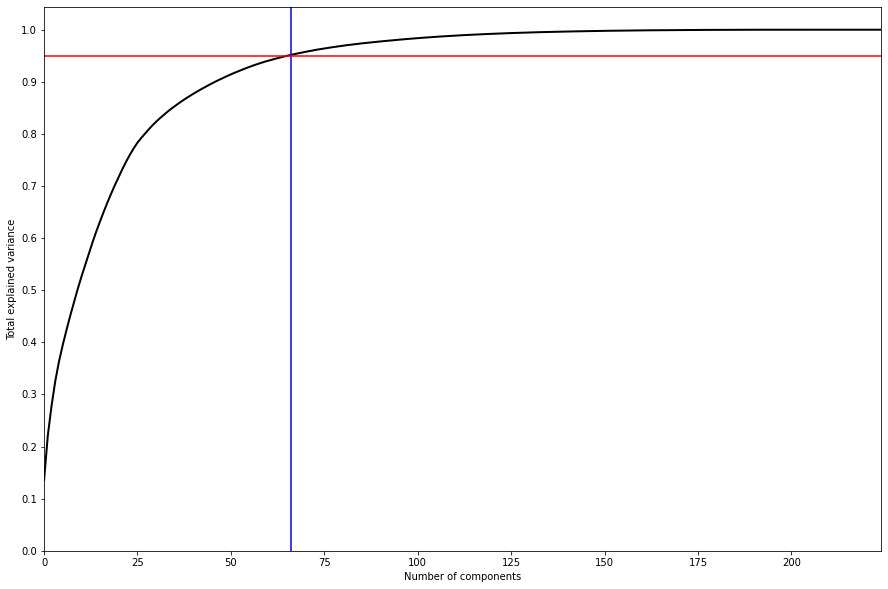

In [101]:
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 224)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(66, c='b')
plt.axhline(0.95, c='r')
plt.show();

Great, we see that for 95% we need 66 main components, but we will keep all the components, since in this case we are not trying to reduce the dimension.

Our goal is to eliminate **possible multicollinearity**

In [102]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Machine Learning

In this work, I will practice ensembles of models without affecting boosting, for this method, I will make another notebook

This project will use models such as:

LinearRegression

Lasso

Ridge

elasticnet

SVR

Kernel Ridge

SGDRegressor

RandomForestRegressor

First, import all the necessary libraries


In [103]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

In [104]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [106]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

--------------------

We will at once create kfold, as well as create the necessary functions for quickly displaying the necessary information

In [107]:
kf = KFold(n_splits=5 , shuffle=True, random_state=17)

In [108]:
def print_metrics(estimator):  
    mae = -cross_val_score(estimator, X_train, y_train, cv = kf, scoring="neg_mean_absolute_error", n_jobs=-1)
    mse = -cross_val_score(estimator, X_train, y_train, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1)
    rmse = np.sqrt(-cross_val_score(estimator, X_train, y_train, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1))
    r2 = cross_val_score(estimator, X_train, y_train, cv = kf, scoring="r2", error_score='raise', n_jobs=-1)
    print(estimator,'\n--------------------------------')
    print('MAE:', np.mean(mae))
    print('MSE:', np.mean(mse))
    print('RMSE:', np.mean(rmse))
    print('R2:', np.mean(r2))
    print('--------------------------------\n')

In [109]:
#def predict_metrics(y_train, pred):  
#    mae = mean_absolute_error(y_train, pred)
#    mse = mean_squared_error(y_train, pred)
#    rmse = np.sqrt(mean_squared_error(y_train, pred))
#    r2 = r2_score(y_train, pred)
#    print('MAE:', mae)
#    print('MSE:', mse)
#    print('RMSE:', rmse)
#    print('R2:', r2)
#    print('')

In [110]:
def check_rmse(estimator):  
    rmse = np.sqrt(-cross_val_score(estimator, X_train, y_train, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1))
    return np.mean(rmse)

In [111]:
def predict_rmse(y_train, pred):
    rmse = np.sqrt(mean_squared_error(y_train, pred))
    return np.mean(rmse)

Great, now we will train the basic models and look at the results, then we will find the optimal parameters for them

## Base models

In [112]:
%%time
lr = LinearRegression().fit(X_train, y_train)
lasso = Lasso(random_state=17).fit(X_train, y_train)
ridge = Ridge(random_state=17).fit(X_train, y_train)
elastic = ElasticNet(random_state=17).fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)
kr = KernelRidge().fit(X_train, y_train)
sgd = SGDRegressor(random_state=17).fit(X_train, y_train)
rs = RandomForestRegressor(random_state=17, n_jobs=-1).fit(X_train, y_train)

CPU times: user 26.3 s, sys: 728 ms, total: 27.1 s
Wall time: 7.5 s


In [113]:
print_metrics(lr), 
print_metrics(lasso), 
print_metrics(ridge),
print_metrics(elastic),
print_metrics(svr),
print_metrics(kr),
print_metrics(sgd), 
print_metrics(rs)


LinearRegression() 
--------------------------------
MAE: 163030333.59883413
MSE: 6.167991431047569e+18
RMSE: 1685828069.8666759
R2: -3.980227424871063e+19
--------------------------------

Lasso(random_state=17) 
--------------------------------
MAE: 0.3105433990340264
MSE: 0.1600050181375428
RMSE: 0.3999430154137801
R2: -0.007103966865295019
--------------------------------

Ridge(random_state=17) 
--------------------------------
MAE: 0.08648640257725967
MSE: 0.015609645999080166
RMSE: 0.12455621202122764
R2: 0.9015839453845376
--------------------------------

ElasticNet(random_state=17) 
--------------------------------
MAE: 0.19312393641057962
MSE: 0.07111818063439912
RMSE: 0.2666370785307143
R2: 0.5523157556591454
--------------------------------

SVR() 
--------------------------------
MAE: 0.10069039936988344
MSE: 0.0240091156983382
RMSE: 0.15421588941136627
R2: 0.8490577913239173
--------------------------------

KernelRidge() 
--------------------------------
MAE: 13.7557027

**Linear Regression** is badly trained, large **MAE** and **MSE**, as well as negative **R2** indicates that the model performs worse than random distribution

**Kernel ridge** is very badly trained, perhaps this is due to the fact that the standard **Kernel ridge** uses **kernel = linear**, which is not suitable for the data

Standard **Lasso** and **ElasticNet** output bad results, this may mean that **L1** regularization or standard **alpha for L1** is not suitable for this goal. Since standart **ElasticNet** uses **0.5 L1** when training the model, this could affect the result

**Ridge**, **SGDRegressor**, **SVR** and **Random Forest** showed good results


--------------------

Explicitly specified hyperparameters will improve the situation, let's find the best parameters for each model 

We will no longer use the standard Linear Regression in this work


## Hyperparameter tuning

In [114]:
def grid_search (estimator, param):
    gscv = GridSearchCV(estimator, param, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
    gscv.fit(X_train, y_train)
    return gscv.best_estimator_

def random_search (estimator, param):
    rscv = RandomizedSearchCV(estimator, param, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
    rscv.fit(X_train, y_train)
    return rscv.best_estimator_

In [115]:
lasso_params = {'alpha':[.0005, .001, .0015, .01, .015, .1, 1]}
ridge_params = {'alpha':[.01, .015, .1, 1, 10, 100]}
sgd_params = {'alpha':[.001, .01, .1, 1], 'eta0':[.001, .003, .01, .03, .1, .3, 1]}
elastic_params ={'alpha':[.0005, .001, .0015, .01, .015, .1, 1], 'l1_ratio':[.1, .3, .5, .7, .9]}
svr_params = {'C': [.001, .015, .01, .1], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
kr_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
rs_params = {'n_estimators': range(100, 551, 50)}

gscv_param = [lasso_params, ridge_params, elastic_params, sgd_params, kr_params]
rscv_param = [svr_params, rs_params]

I decided not to write a huge number of different parameters, but limited myself to the most important ones for each model.

Also, for faster parameter finding, for long-learning models such as **RandomForest** or **SVR**, I will use **RandomSearch**


In [116]:
%%time
best_est = []
n=0
for model in [lasso, ridge, elastic, sgd, kr]:
    best_est.append(grid_search(model, gscv_param[n]))
    n+=1
n=0
for model in [svr, rs]:
    best_est.append(random_search(model, rscv_param[n]))
    n+=1

CPU times: user 2min 21s, sys: 1.3 s, total: 2min 22s
Wall time: 14min 11s


In [117]:
best_est

[Lasso(alpha=0.0005, random_state=17),
 Ridge(alpha=10, random_state=17),
 ElasticNet(alpha=0.001, l1_ratio=0.3, random_state=17),
 SGDRegressor(alpha=0.1, random_state=17),
 KernelRidge(kernel='poly'),
 SVR(C=0.015, kernel='linear'),
 RandomForestRegressor(n_estimators=550, n_jobs=-1, random_state=17)]

In [118]:
for model in best_est:
    print_metrics(model)

Lasso(alpha=0.0005, random_state=17) 
--------------------------------
MAE: 0.08504919772388995
MSE: 0.014582496854699886
RMSE: 0.12057880614471835
R2: 0.9079857665755103
--------------------------------

Ridge(alpha=10, random_state=17) 
--------------------------------
MAE: 0.08428039034917754
MSE: 0.014555354648044092
RMSE: 0.12040152323883732
R2: 0.9081682912712005
--------------------------------

ElasticNet(alpha=0.001, l1_ratio=0.3, random_state=17) 
--------------------------------
MAE: 0.08459039416360092
MSE: 0.014489148476607209
RMSE: 0.12017775611171715
R2: 0.9086063161062766
--------------------------------

SGDRegressor(alpha=0.1, random_state=17) 
--------------------------------
MAE: 0.09001001056973643
MSE: 0.015976432823877902
RMSE: 0.12628576441548464
R2: 0.8992653279632163
--------------------------------

KernelRidge(kernel='poly') 
--------------------------------
MAE: 0.08232663851114265
MSE: 0.013996685179470988
RMSE: 0.11814679721905878
R2: 0.91172549630549
---

Great! After hyper-tuning, all our models performed much better, with the exception of **Random Forest**: hyper-tuning improved the results, but not significantly compared to the base model

For further work speed up, I will not use Random Forest, because training this model takes a lot of time, and the result is worse than other algorithms one

Let's reassign the model data as the main model and save the results

As the data on Kaggle imply checking for **RMSE**, in order to reduce the training time and calculate metrics, in the future I will only consider **RMSE**

In [119]:
best_est

[Lasso(alpha=0.0005, random_state=17),
 Ridge(alpha=10, random_state=17),
 ElasticNet(alpha=0.001, l1_ratio=0.3, random_state=17),
 SGDRegressor(alpha=0.1, random_state=17),
 KernelRidge(kernel='poly'),
 SVR(C=0.015, kernel='linear'),
 RandomForestRegressor(n_estimators=550, n_jobs=-1, random_state=17)]

In [120]:
best_est = best_est[:6]

lasso = best_est[0]
ridge = best_est[1]
elastic = best_est[2]
sgd = best_est[3]
kr = best_est[4]
svr = best_est[5]

lasso_rmse = predict_rmse(y_train, lasso.predict(X_train))
ridge_rmse = predict_rmse(y_train, ridge.predict(X_train))
elastic_rmse = predict_rmse(y_train, elastic.predict(X_train))
sgd_rmse = predict_rmse(y_train, sgd.predict(X_train))
kr_rmse = predict_rmse(y_train, kr.predict(X_train))
svr_rmse = predict_rmse(y_train, svr.predict(X_train))

Now let's start trying ensemble methods, ranging from simple ones to more complex ones.

Although we have already used Random Forest. This model belongs to the **bagging method** and implements its algorithm, so I will not try to apply **BaggingRegressor** in this notebook, especially Random Forest shows itself worse than other regression models.

**Bagging** and **boosting** are needed to reduce one of the trade-off metrics: **bias** and **variance**.
**Staking** does not try to minimize any of these errors.
Successfully stacking simply reduces the error, and as a result, its components will also decrease.

In [121]:
def plot_learning_curve(estimator, X, y):
    
    train_sizes, train_score, test_score = learning_curve(
    estimator =  estimator,
    X = X,
    y = y, 
    train_sizes = np.linspace(0.01, 1.0, 50), 
    cv = kf,
    n_jobs=-1,
    shuffle=True,
    scoring='neg_mean_squared_error',
    random_state=17) 
    
    mean_train = -np.mean(train_score, axis=1)
    mean_test = -np.mean(test_score, axis=1)

    plt.plot(train_sizes, mean_train, '--', color="b",  label="Training score")
    plt.plot(train_sizes, mean_test ,color="g", label="Cross-validation score")

    plt.title('Learning curve')
    plt.xlabel("Size"),
    plt.ylabel("Rmse"),
    plt.legend(loc="best")
    plt.show()

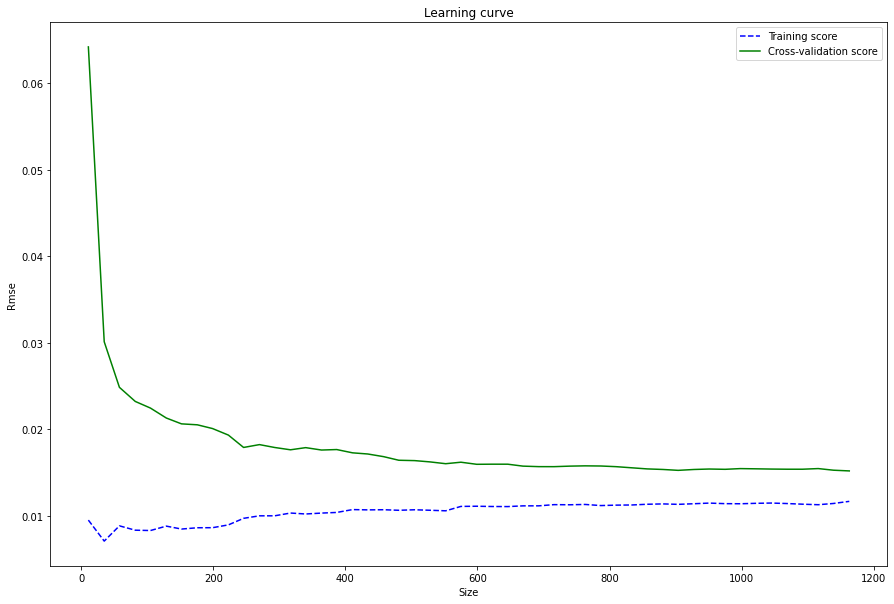

In [122]:
plt.figure(figsize=(15,10))
plot_learning_curve(svr, X_train, y_train)

In this case, we do not have a large **bias** or **variance**, and reducing these metrics is not the main goal of this notebook

Let me remind you that **boosting** is also not intentionally used in this work, the goal of this notebook is not to get the best result, but to learn how to apply only some **ensemble methods** of machine learning.

# Ensemble methods

Here I will try ensemble algorithms like:

1. **Voting Ensembles**
2. **Weight voting Ensembles**
3. **Stacking**

## Voting Ensembles

This method is more often used in classification problems, but you can also try it for regression.

The method is that we take the arithmetic mean of our predictions

In [123]:
%%time
voting = VotingRegressor([('lasso',lasso),('ridge',ridge),('elastic', elastic),('svr',svr),('kr',kr),('sgd',sgd)], n_jobs=-1)
voting.fit(X_train, y_train)

CPU times: user 21.7 ms, sys: 9.99 ms, total: 31.7 ms
Wall time: 479 ms


VotingRegressor(estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                            ('ridge', Ridge(alpha=10, random_state=17)),
                            ('elastic',
                             ElasticNet(alpha=0.001, l1_ratio=0.3,
                                        random_state=17)),
                            ('svr', SVR(C=0.015, kernel='linear')),
                            ('kr', KernelRidge(kernel='poly')),
                            ('sgd', SGDRegressor(alpha=0.1, random_state=17))],
                n_jobs=-1)

In [124]:
print_metrics(voting)

VotingRegressor(estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                            ('ridge', Ridge(alpha=10, random_state=17)),
                            ('elastic',
                             ElasticNet(alpha=0.001, l1_ratio=0.3,
                                        random_state=17)),
                            ('svr', SVR(C=0.015, kernel='linear')),
                            ('kr', KernelRidge(kernel='poly')),
                            ('sgd', SGDRegressor(alpha=0.1, random_state=17))],
                n_jobs=-1) 
--------------------------------
MAE: 0.08377371647935258
MSE: 0.01425618510781922
RMSE: 0.1192221293216984
R2: 0.9100719057880454
--------------------------------



In [125]:
voting_rmse = predict_rmse(y_train, voting.predict(X_train))

## Weight voting Ensembles

In this method, we must give our models **weights** that will decide the overall contribution of a particular model to the prediction.

Let's look at the results of our models on the chart and decide what **weights** to assign to each model.

In [126]:
scores = {}
for model in best_est:
    scores[str(model)[:(str(model).find('('))]] = check_rmse(model)

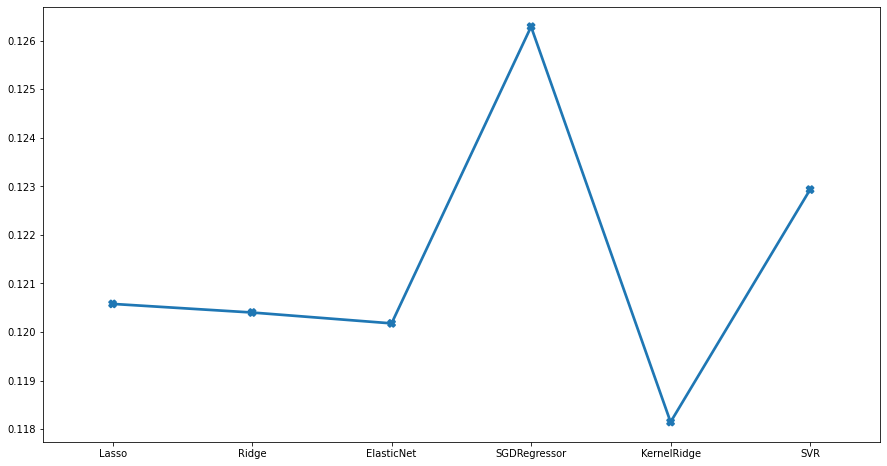

In [127]:
plt.figure(figsize=(15,8))
sns.pointplot(y = list(scores.values()), x=list(scores.keys()),markers='X');

In [128]:
w1, w2, w3, w4, w5, w6 = 0.16, 0.18, 0.2, 0.03, 0.35, 0.08

In [129]:
weight_voting = VotingRegressor([('lasso',lasso),('ridge',ridge),('elastic', elastic),('sgd',sgd),('kr',kr),('svr',svr)],
                                weights=[w1, w2, w3, w4, w5, w6],
                                n_jobs=-1)
weight_voting.fit(X_train, y_train)

VotingRegressor(estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                            ('ridge', Ridge(alpha=10, random_state=17)),
                            ('elastic',
                             ElasticNet(alpha=0.001, l1_ratio=0.3,
                                        random_state=17)),
                            ('sgd', SGDRegressor(alpha=0.1, random_state=17)),
                            ('kr', KernelRidge(kernel='poly')),
                            ('svr', SVR(C=0.015, kernel='linear'))],
                n_jobs=-1, weights=[0.16, 0.18, 0.2, 0.03, 0.35, 0.08])

In [130]:
print_metrics(weight_voting)

VotingRegressor(estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                            ('ridge', Ridge(alpha=10, random_state=17)),
                            ('elastic',
                             ElasticNet(alpha=0.001, l1_ratio=0.3,
                                        random_state=17)),
                            ('sgd', SGDRegressor(alpha=0.1, random_state=17)),
                            ('kr', KernelRidge(kernel='poly')),
                            ('svr', SVR(C=0.015, kernel='linear'))],
                n_jobs=-1, weights=[0.16, 0.18, 0.2, 0.03, 0.35, 0.08]) 
--------------------------------
MAE: 0.0825866242387494
MSE: 0.013954018016502484
RMSE: 0.11794407809243476
R2: 0.9119770783594643
--------------------------------



In [131]:
weight_voting_rmse = predict_rmse(y_train, weight_voting.predict(X_train))

## Stacking 

In this method, we use cross-validation to get the predictions of the **base model**, then these predictions are passed to the **meta-model**, which makes the final prediction

In [132]:
%%time
stack = StackingRegressor([('lasso',lasso),('ridge',ridge),('svr',svr),('sgd',sgd),('kr',kr),('elastic',elastic)], kr, cv=kf, n_jobs=-1)
stack.fit(X_train, y_train)

CPU times: user 430 ms, sys: 310 ms, total: 740 ms
Wall time: 1.66 s


StackingRegressor(cv=KFold(n_splits=5, random_state=17, shuffle=True),
                  estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                              ('ridge', Ridge(alpha=10, random_state=17)),
                              ('svr', SVR(C=0.015, kernel='linear')),
                              ('sgd', SGDRegressor(alpha=0.1, random_state=17)),
                              ('kr', KernelRidge(kernel='poly')),
                              ('elastic',
                               ElasticNet(alpha=0.001, l1_ratio=0.3,
                                          random_state=17))],
                  final_estimator=KernelRidge(kernel='poly'), n_jobs=-1)

In [133]:
print_metrics(stack)

StackingRegressor(cv=KFold(n_splits=5, random_state=17, shuffle=True),
                  estimators=[('lasso', Lasso(alpha=0.0005, random_state=17)),
                              ('ridge', Ridge(alpha=10, random_state=17)),
                              ('svr', SVR(C=0.015, kernel='linear')),
                              ('sgd', SGDRegressor(alpha=0.1, random_state=17)),
                              ('kr', KernelRidge(kernel='poly')),
                              ('elastic',
                               ElasticNet(alpha=0.001, l1_ratio=0.3,
                                          random_state=17))],
                  final_estimator=KernelRidge(kernel='poly'), n_jobs=-1) 
--------------------------------
MAE: 0.08118672899028975
MSE: 0.013665668545149709
RMSE: 0.1166011660937892
R2: 0.9138209056546389
--------------------------------



In [134]:
stack_rmse = predict_rmse(y_train, stack.predict(X_train))

# Result and submission

In [135]:
result =[lasso_rmse, ridge_rmse, elastic_rmse, sgd_rmse, kr_rmse, svr_rmse, voting_rmse, weight_voting_rmse, stack_rmse]
model_name =['Lasso','Ridge','Elastic Net','SGDRegressor','Kernel Ridge','SVR','Voting','Weight voting','Stacking']

In [136]:
result_rmse = pd.DataFrame(result, index=model_name, columns=['RMSE']).sort_values(['RMSE']).T
result_rmse

,Stacking,Kernel Ridge,Weight voting,Ridge,Voting,Elastic Net,Lasso,SVR,SGDRegressor
RMSE,0.091749,0.097006,0.101541,0.104419,0.104883,0.105689,0.108115,0.108775,0.11654


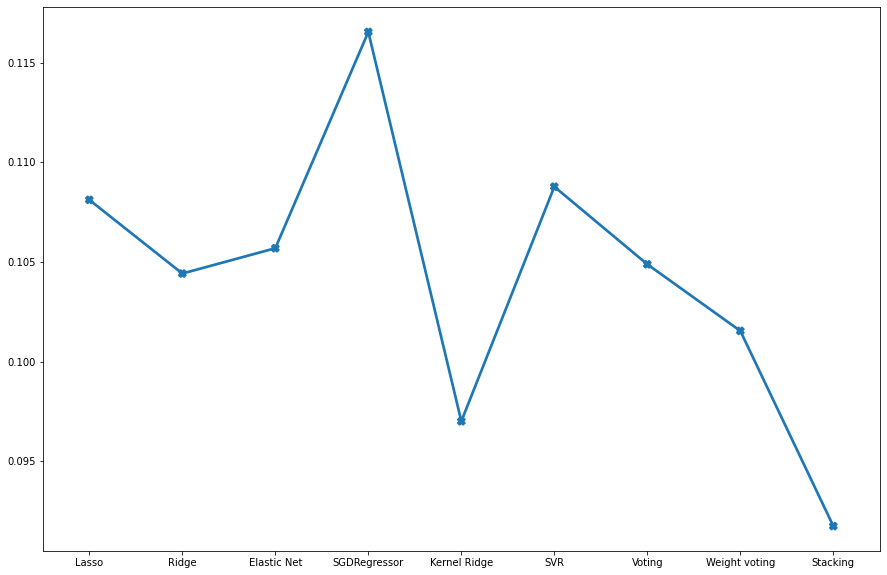

In [137]:
plt.figure(figsize=(15,10))
sns.pointplot(y = result, x=model_name,markers='X');

In our notebook, the best model was **Stacking Model**, but I want to present the average of the best models, this should improve accuracy even more.

In [138]:
final_model = VotingRegressor([('ridge',ridge),('elastic', elastic),('kr',kr),('voting', voting),('weight_voting',weight_voting),('stack',stack)],
                                weights=[0.1, 0.1, 0.2, 0.1, 0.15, 0.35],
                                n_jobs=-1).fit(X_train, y_train)

In [139]:
predict = np.exp(final_model.predict(X_test))

In [140]:
submission = pd.DataFrame({'Id':y_test.Id, 'SalePrice': predict})

In [141]:
submission.to_csv('submission_house_price_final.csv', index=False)

In [142]:
submission.head()

,Id,SalePrice
0,1461,127883.017060
1,1462,157823.547689
2,1463,187815.266535
3,1464,211915.276169
4,1465,200091.345223


## Thank you for watching it's my project, I will be grateful if you give feedback on my work in comments. I want to improve my skills and if you find mistakes in work, tell me about it, please.